In [2]:
from google.colab import drive
drive.mount('/content/driver/')

Mounted at /content/driver/


In [1]:
pip install ultralytics


  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/882.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/882.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/882.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/882.2 kB ? eta -:--:--
   ---------------------- --------------- 524.3/882.2 kB 762.0 kB/s eta 0:00:01
   --------------------------------- ---- 786.4/882.2 kB 799.2 kB/s eta 0:00:01
   -------------------------------------- 882.2/882.2 kB 778.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
import os
import glob
from ultralytics import YOLO
from IPython.display import Image, display

In [7]:
%cd /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection
!ls

/content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection
custom.yaml  data  runs  runs1	yolov8.ipynb  yolov8n.pt


### Train the Model

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=custom.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=custom.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

In [ ]:
!ls 'runs/detect/train'

args.yaml					     train_batch1.jpg
confusion_matrix_normalized.png			     train_batch2840.jpg
confusion_matrix.png				     train_batch2841.jpg
events.out.tfevents.1693170896.2eb529bb13f1.29409.0  train_batch2842.jpg
F1_curve.png					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
P_curve.png					     val_batch1_labels.jpg
PR_curve.png					     val_batch1_pred.jpg
R_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights
train_batch0.jpg


## Visualize the training output

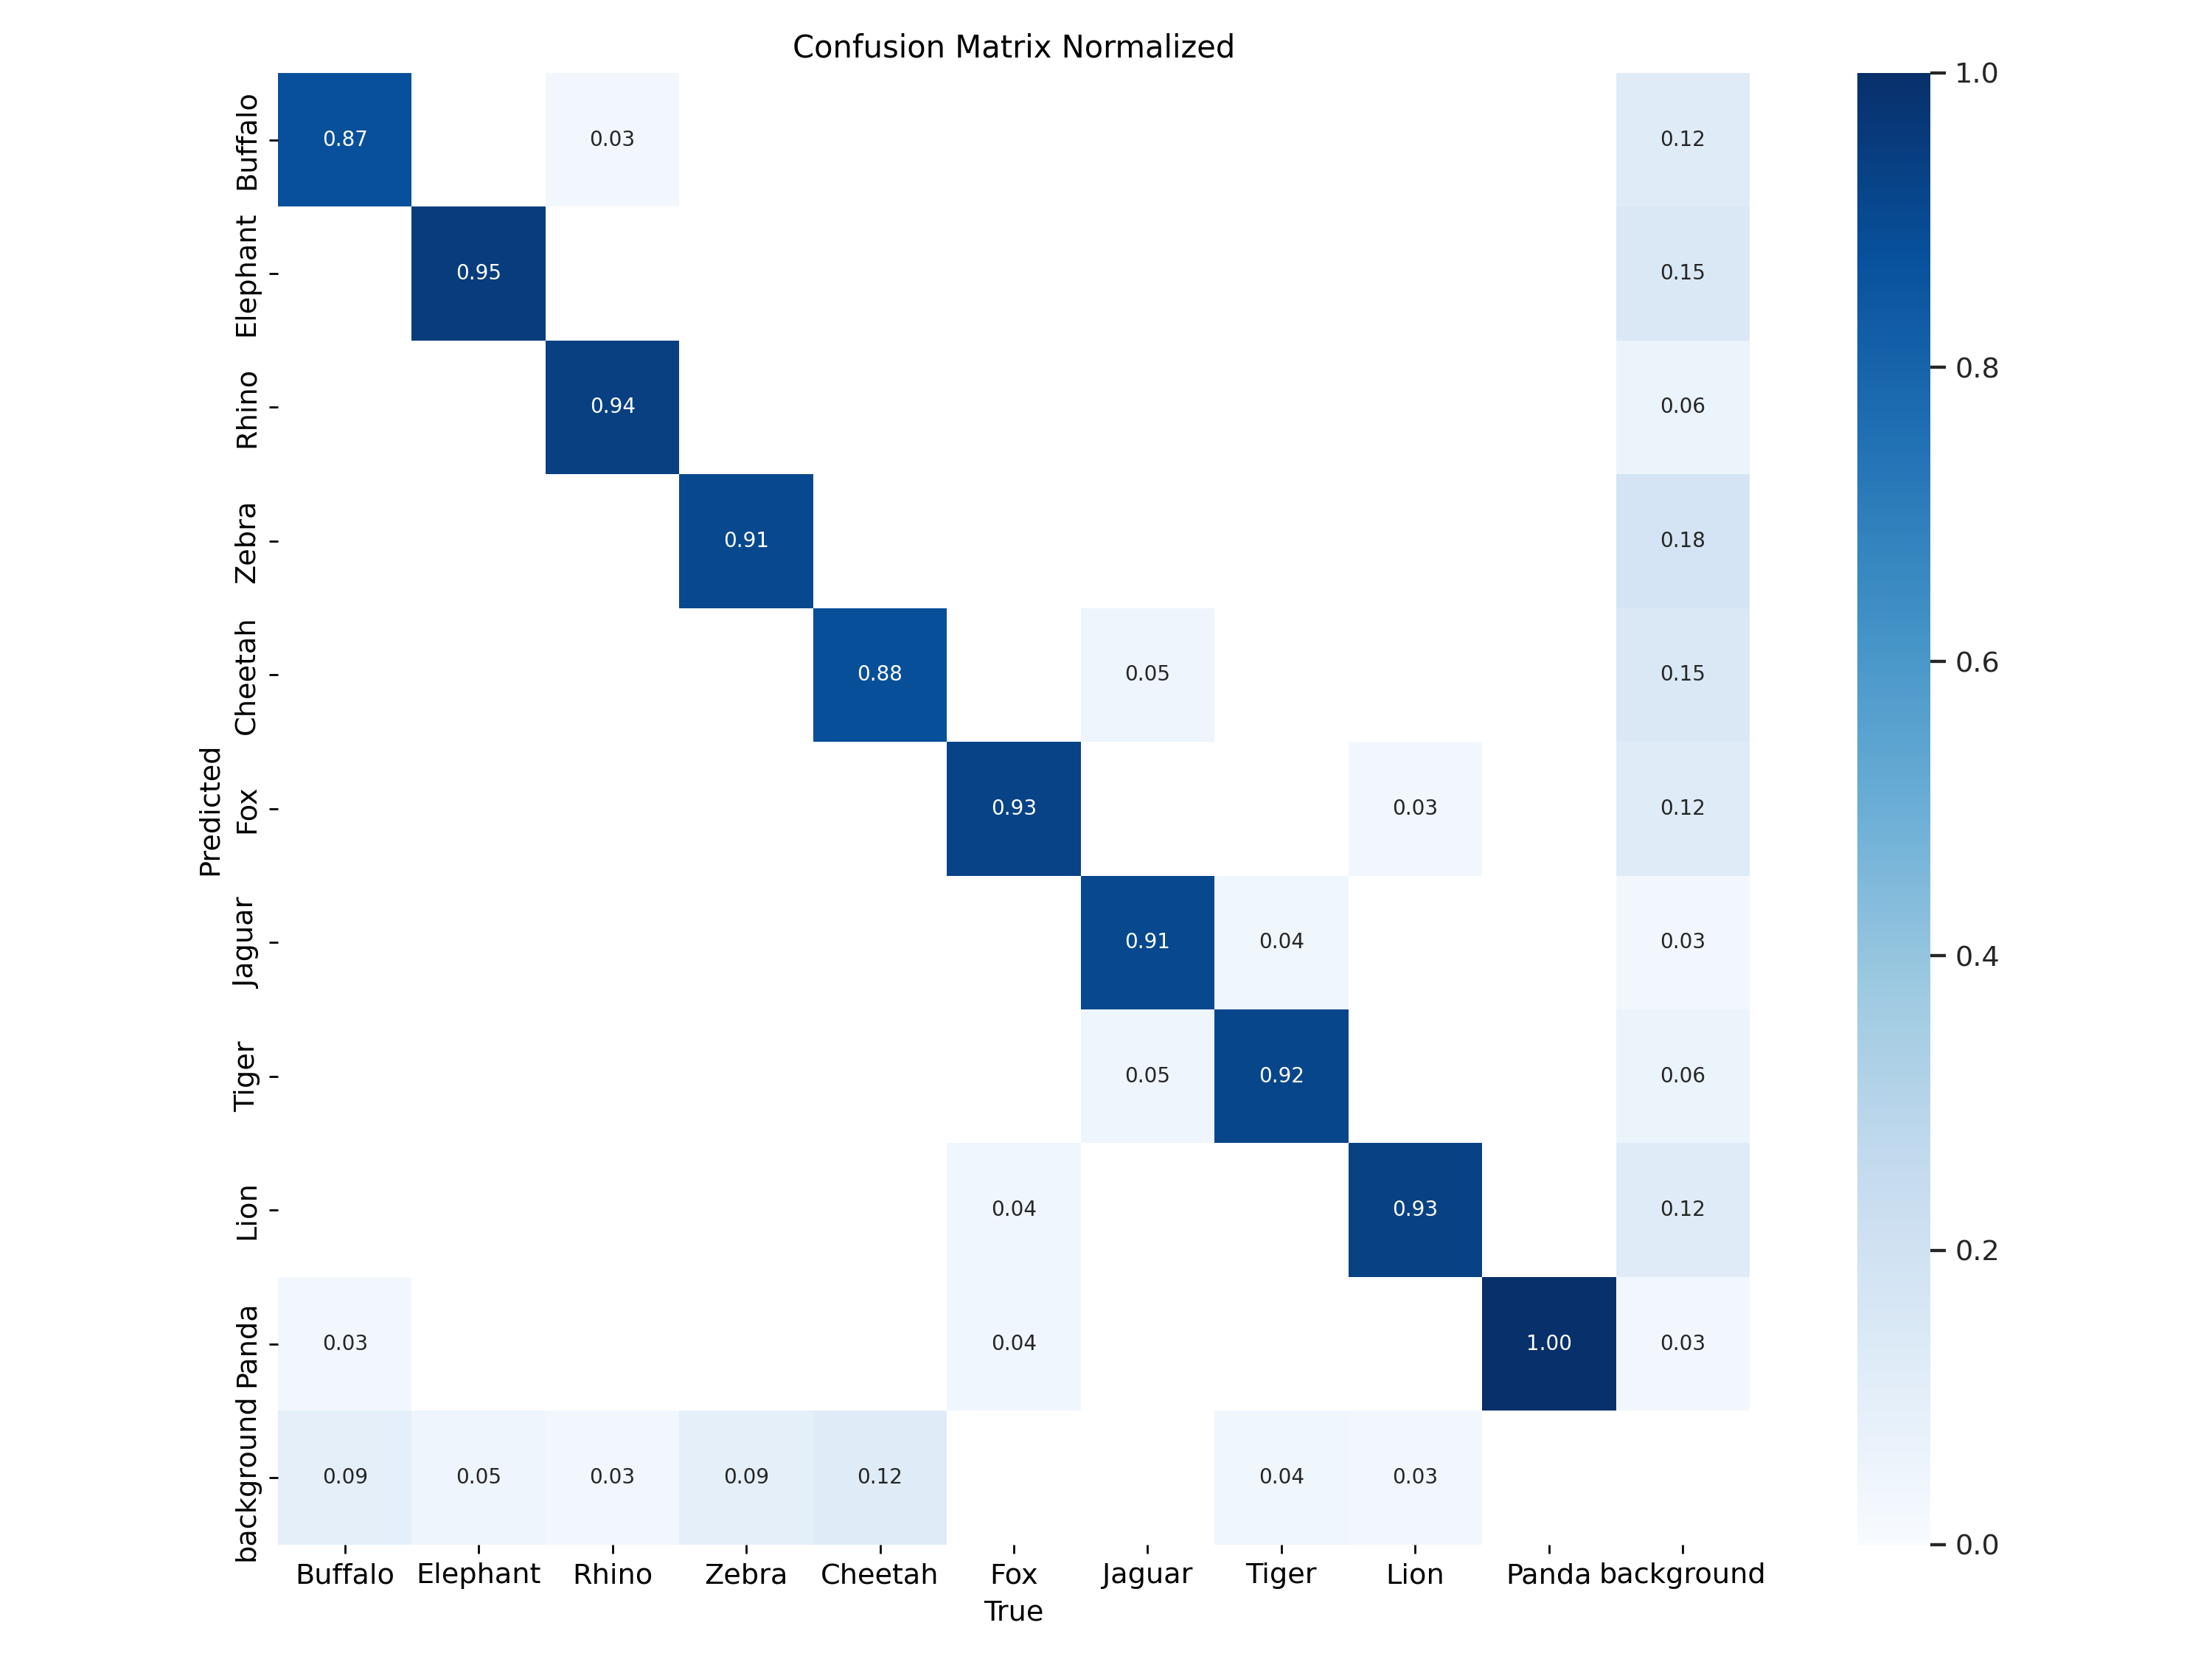

In [ ]:
display(Image(filename="runs/detect/train/confusion_matrix_normalized.png", width=1000))

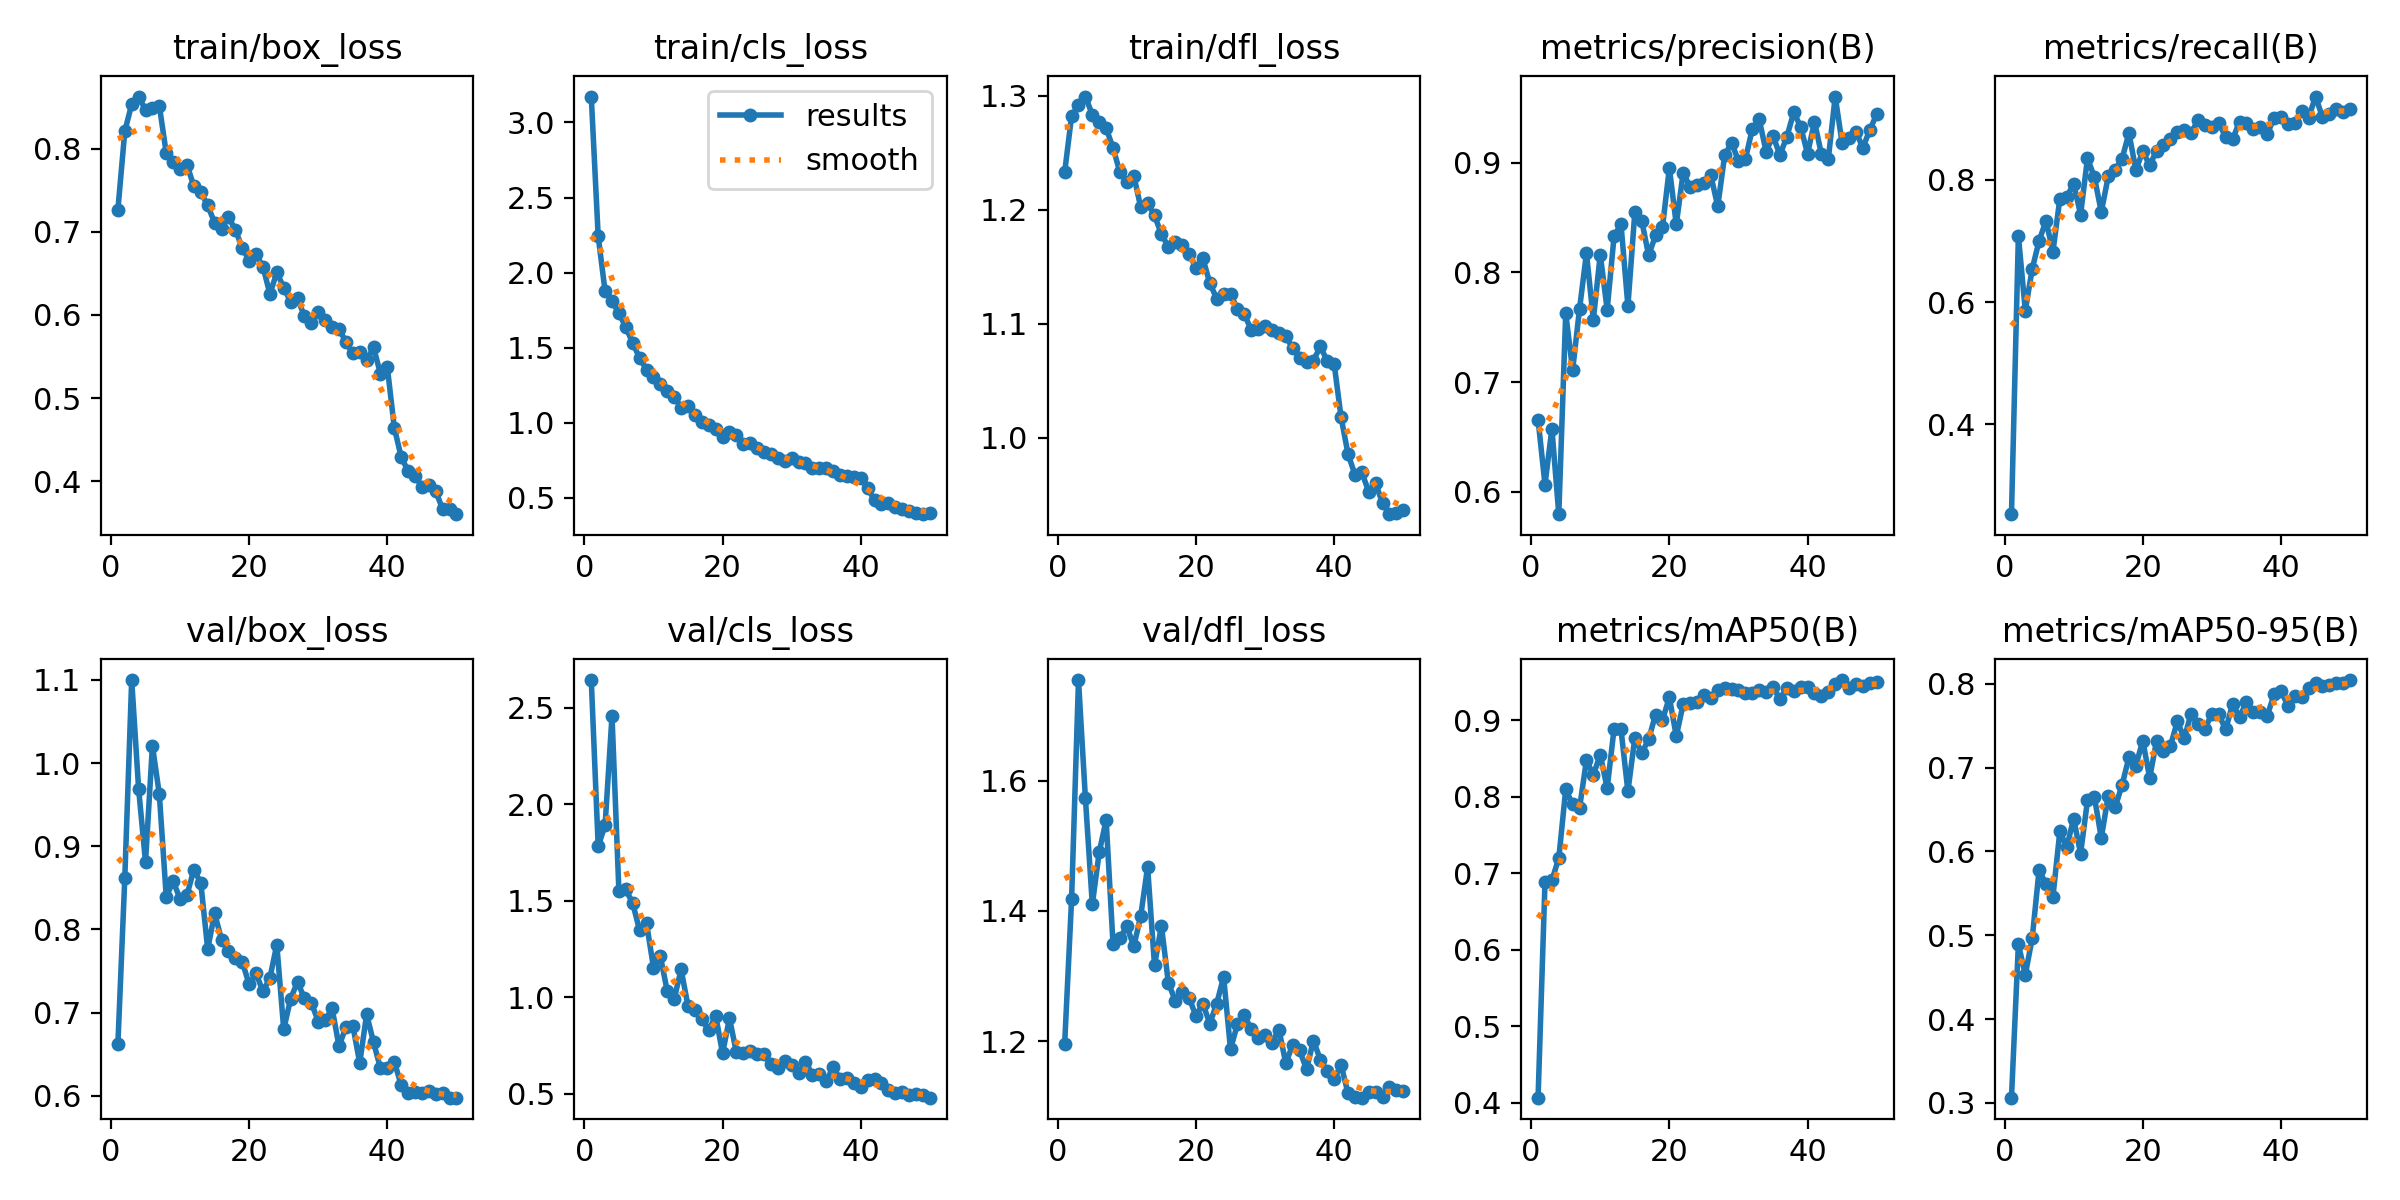

In [ ]:
display(Image(filename="runs/detect/train/results.png", width=1000))

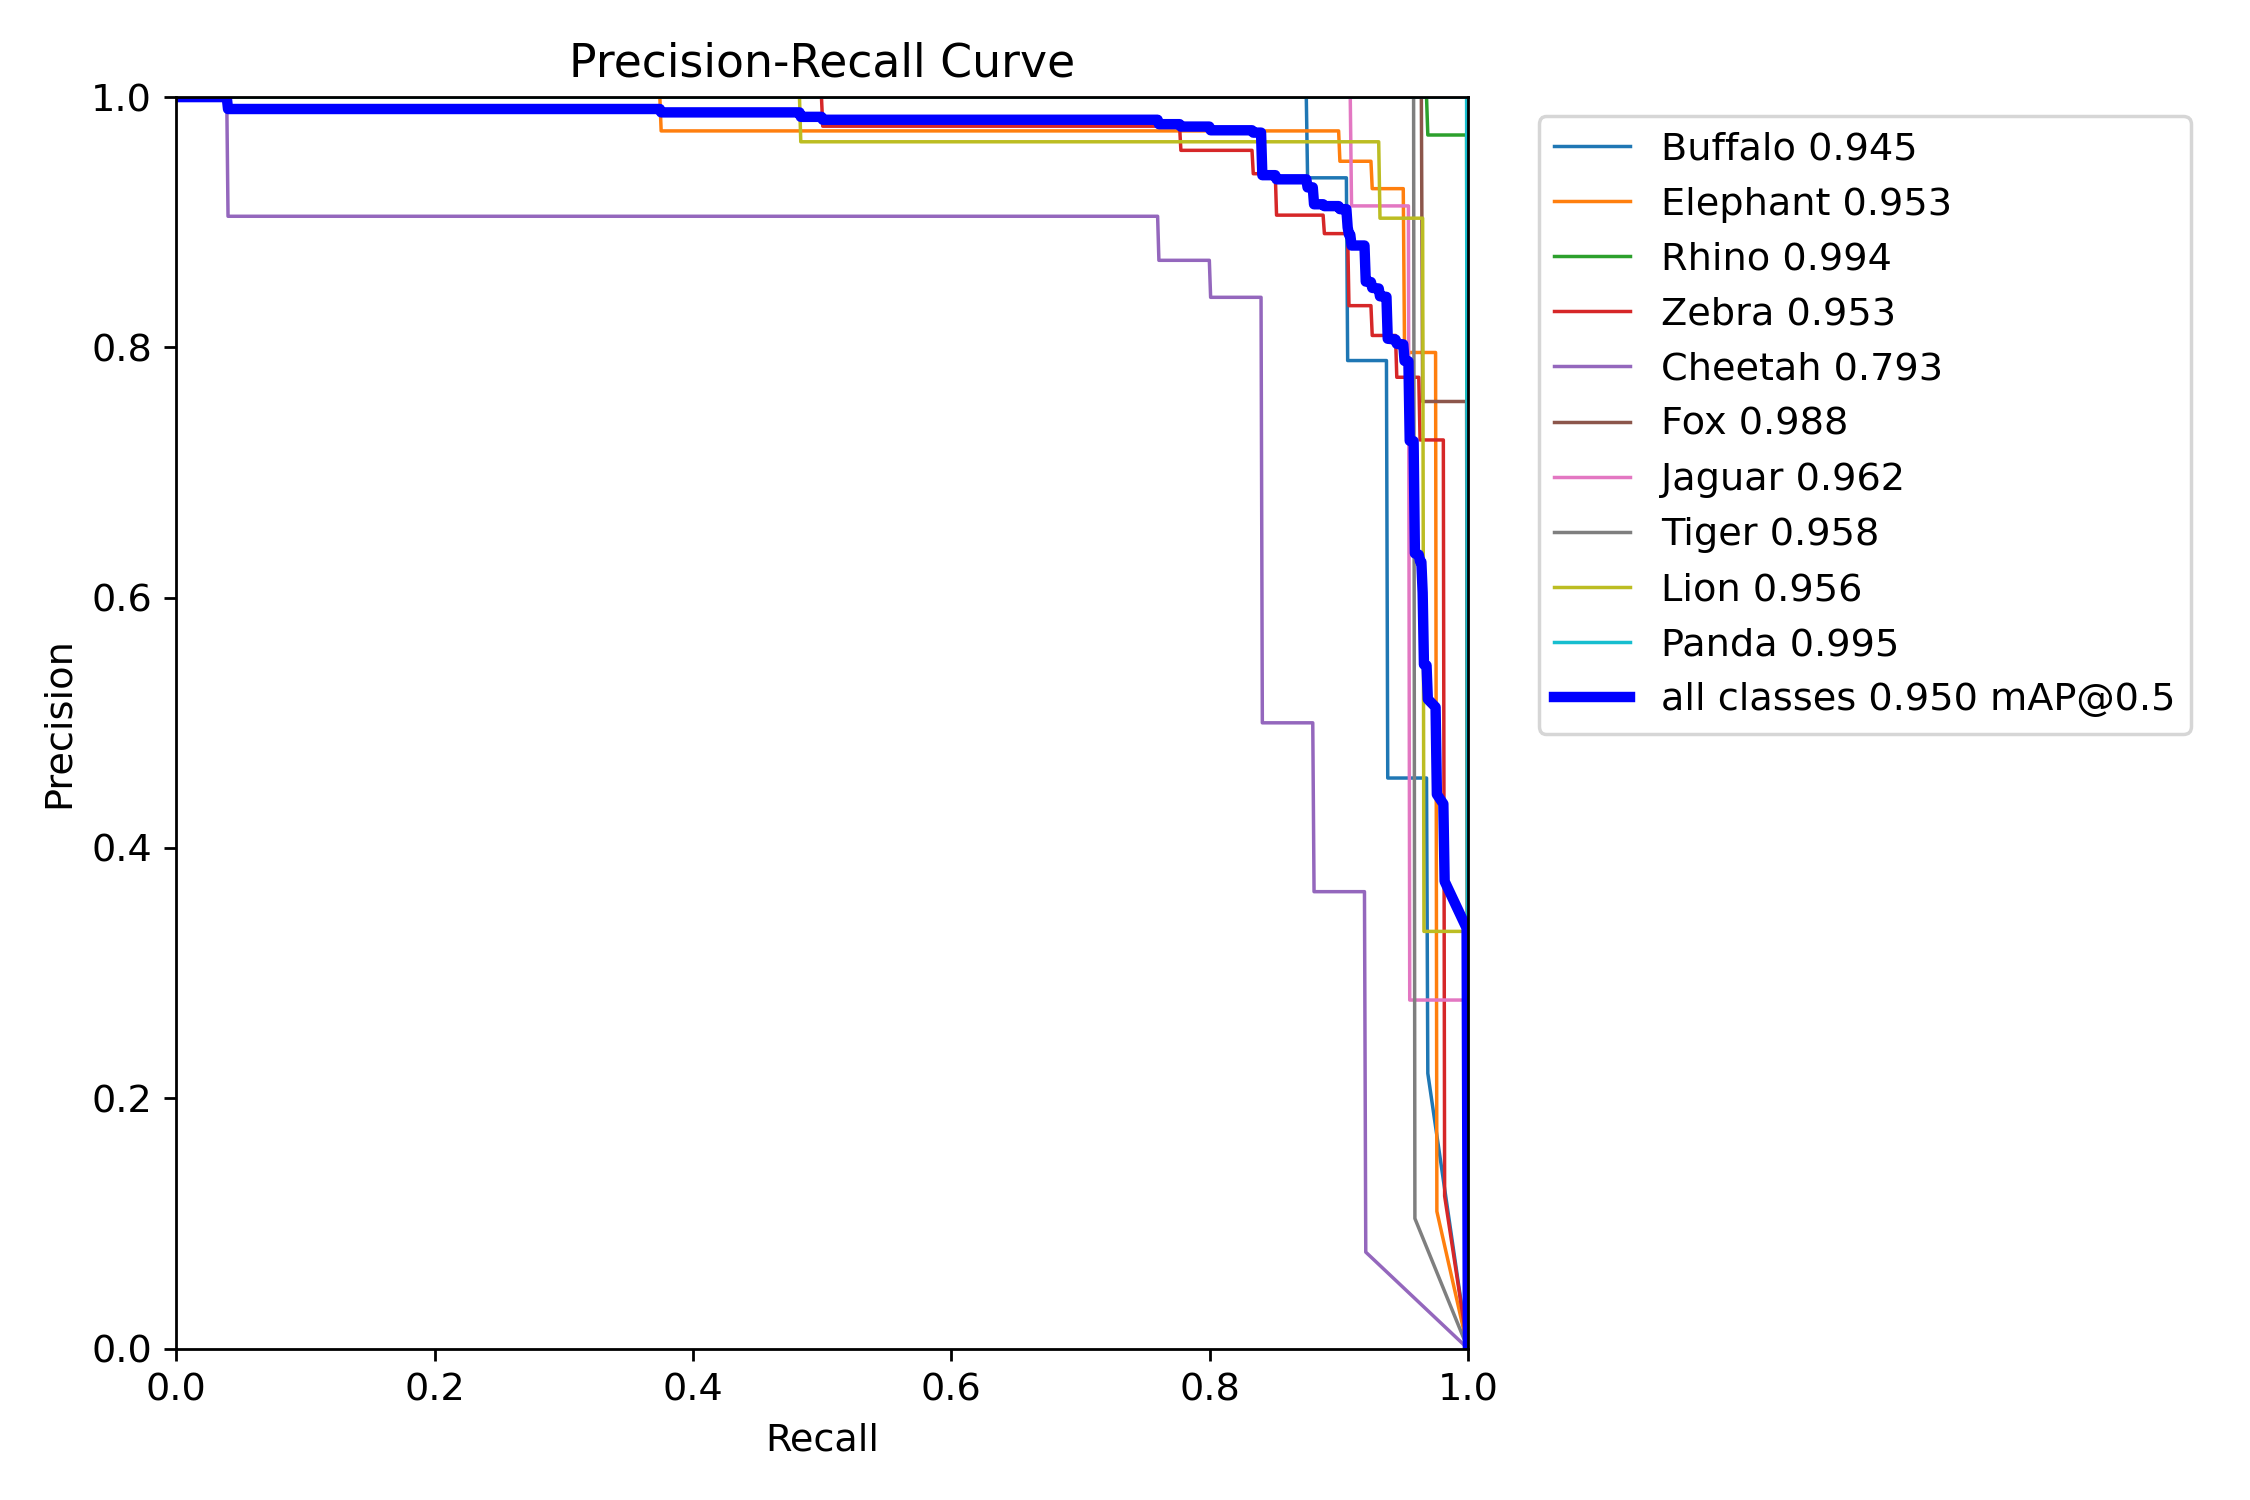

In [8]:
display(Image(filename="runs/detect/train/PR_curve.png", width=1000))

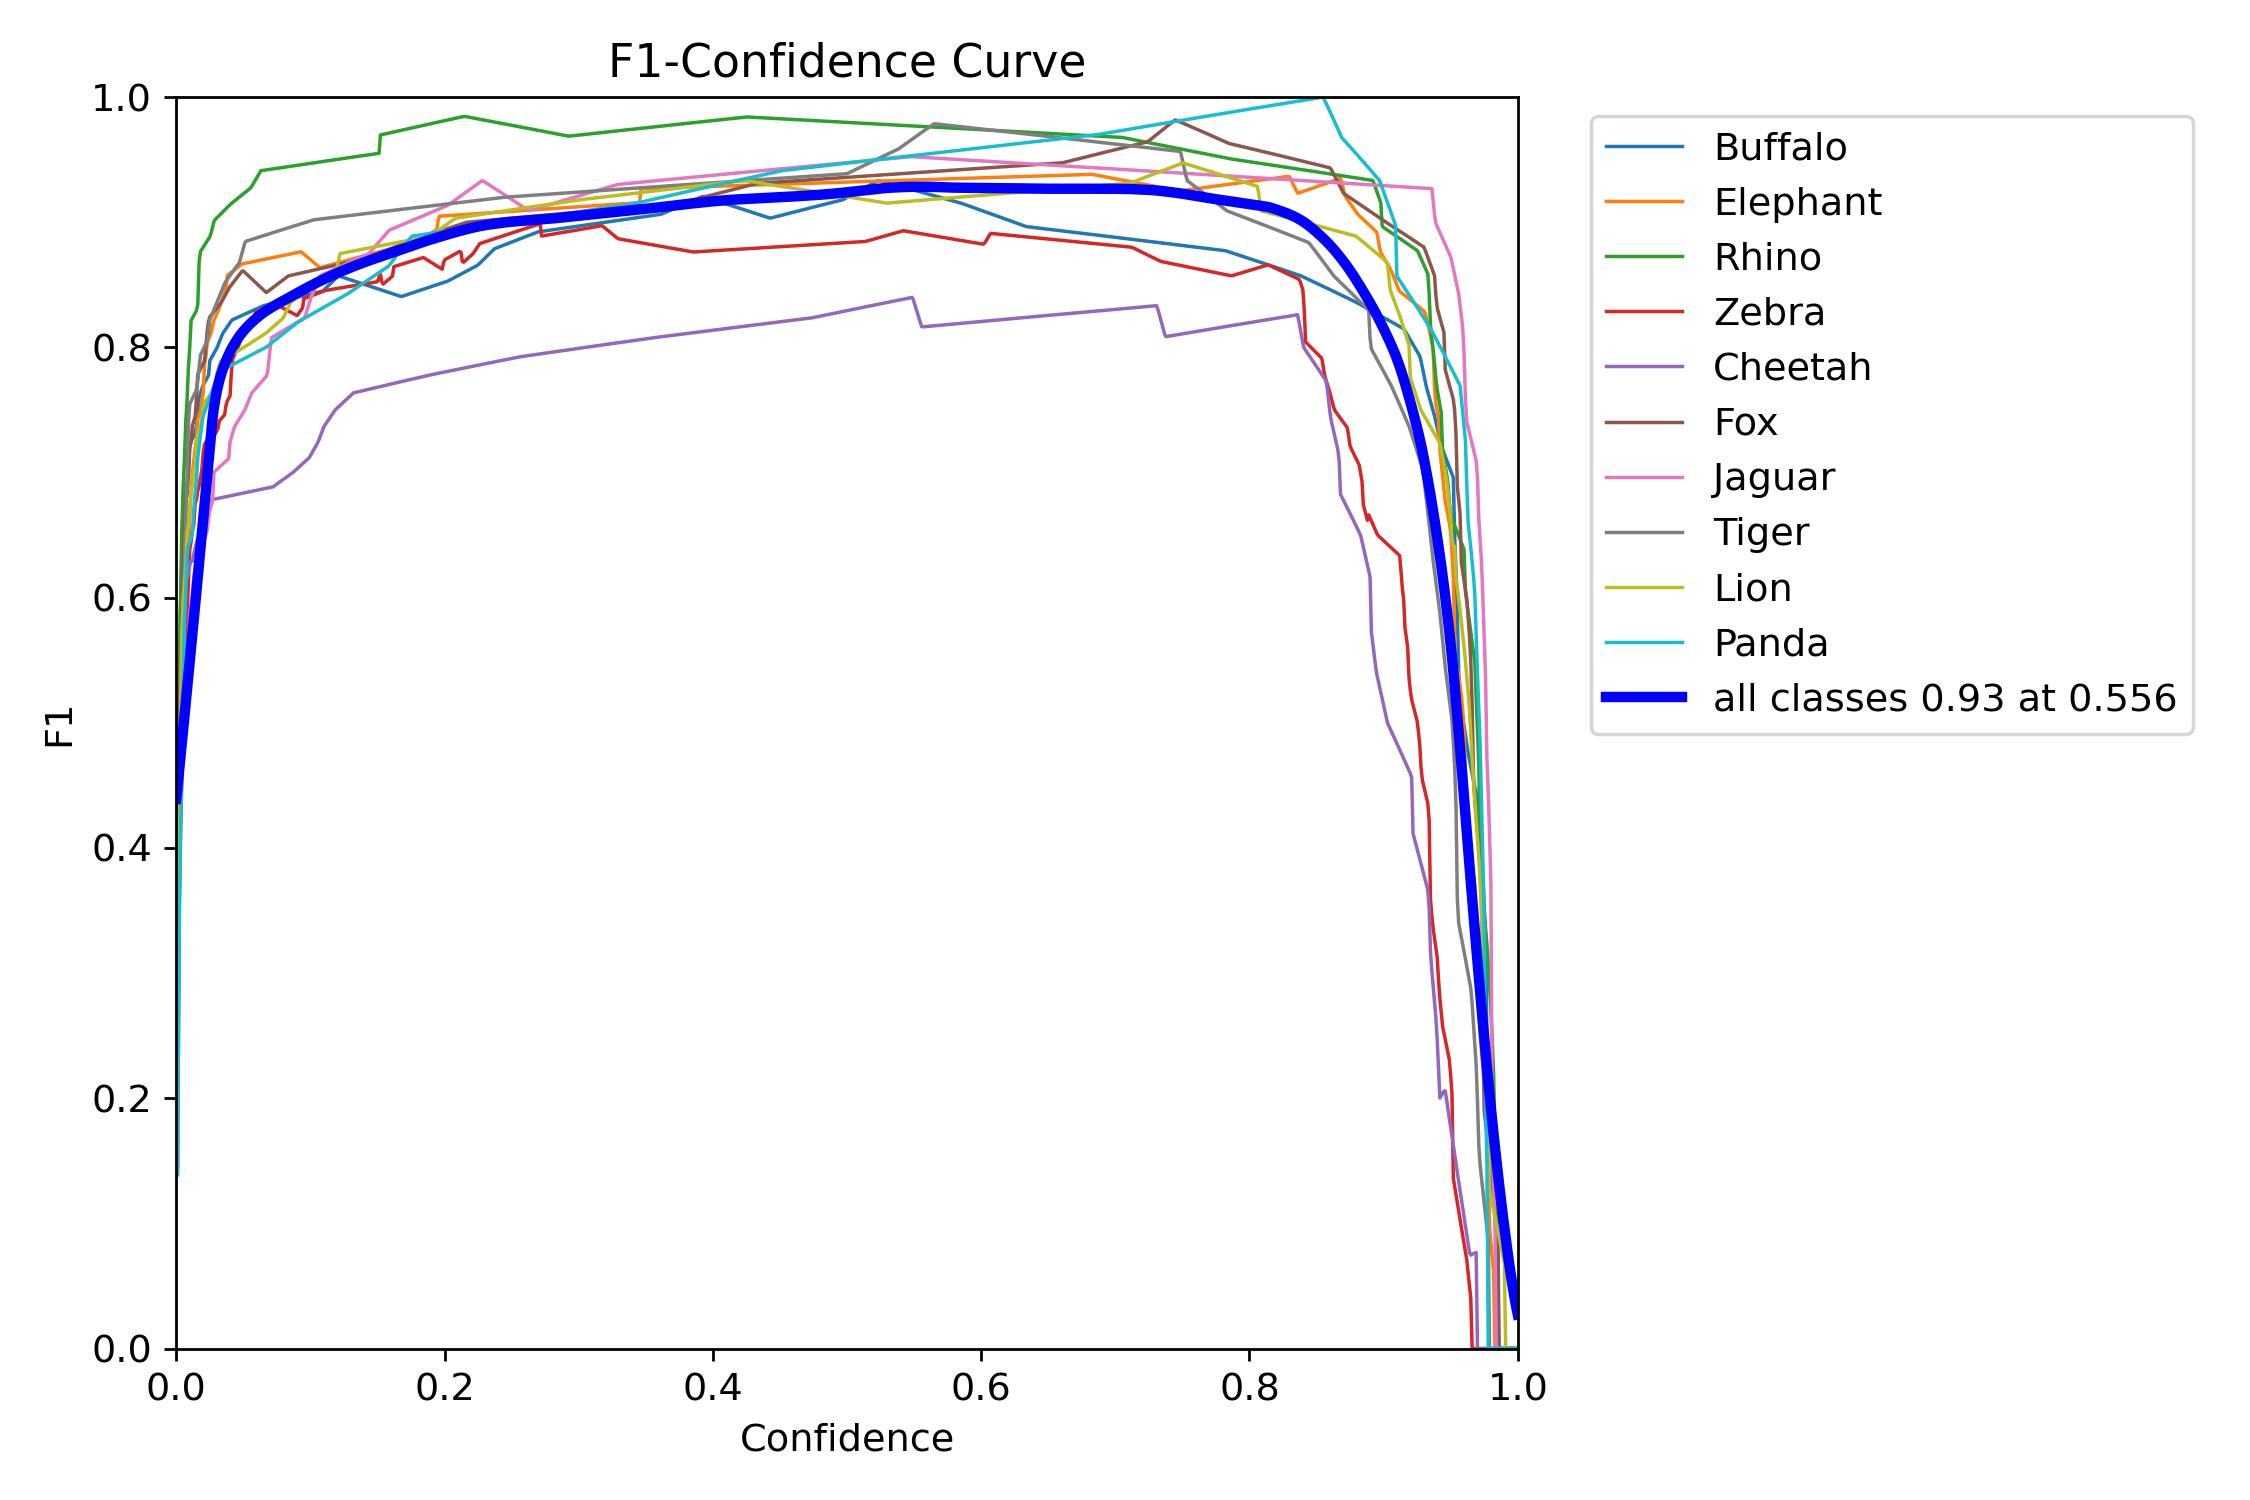

In [ ]:
display(Image(filename="runs/detect/train/F1_curve.png", width=1000))

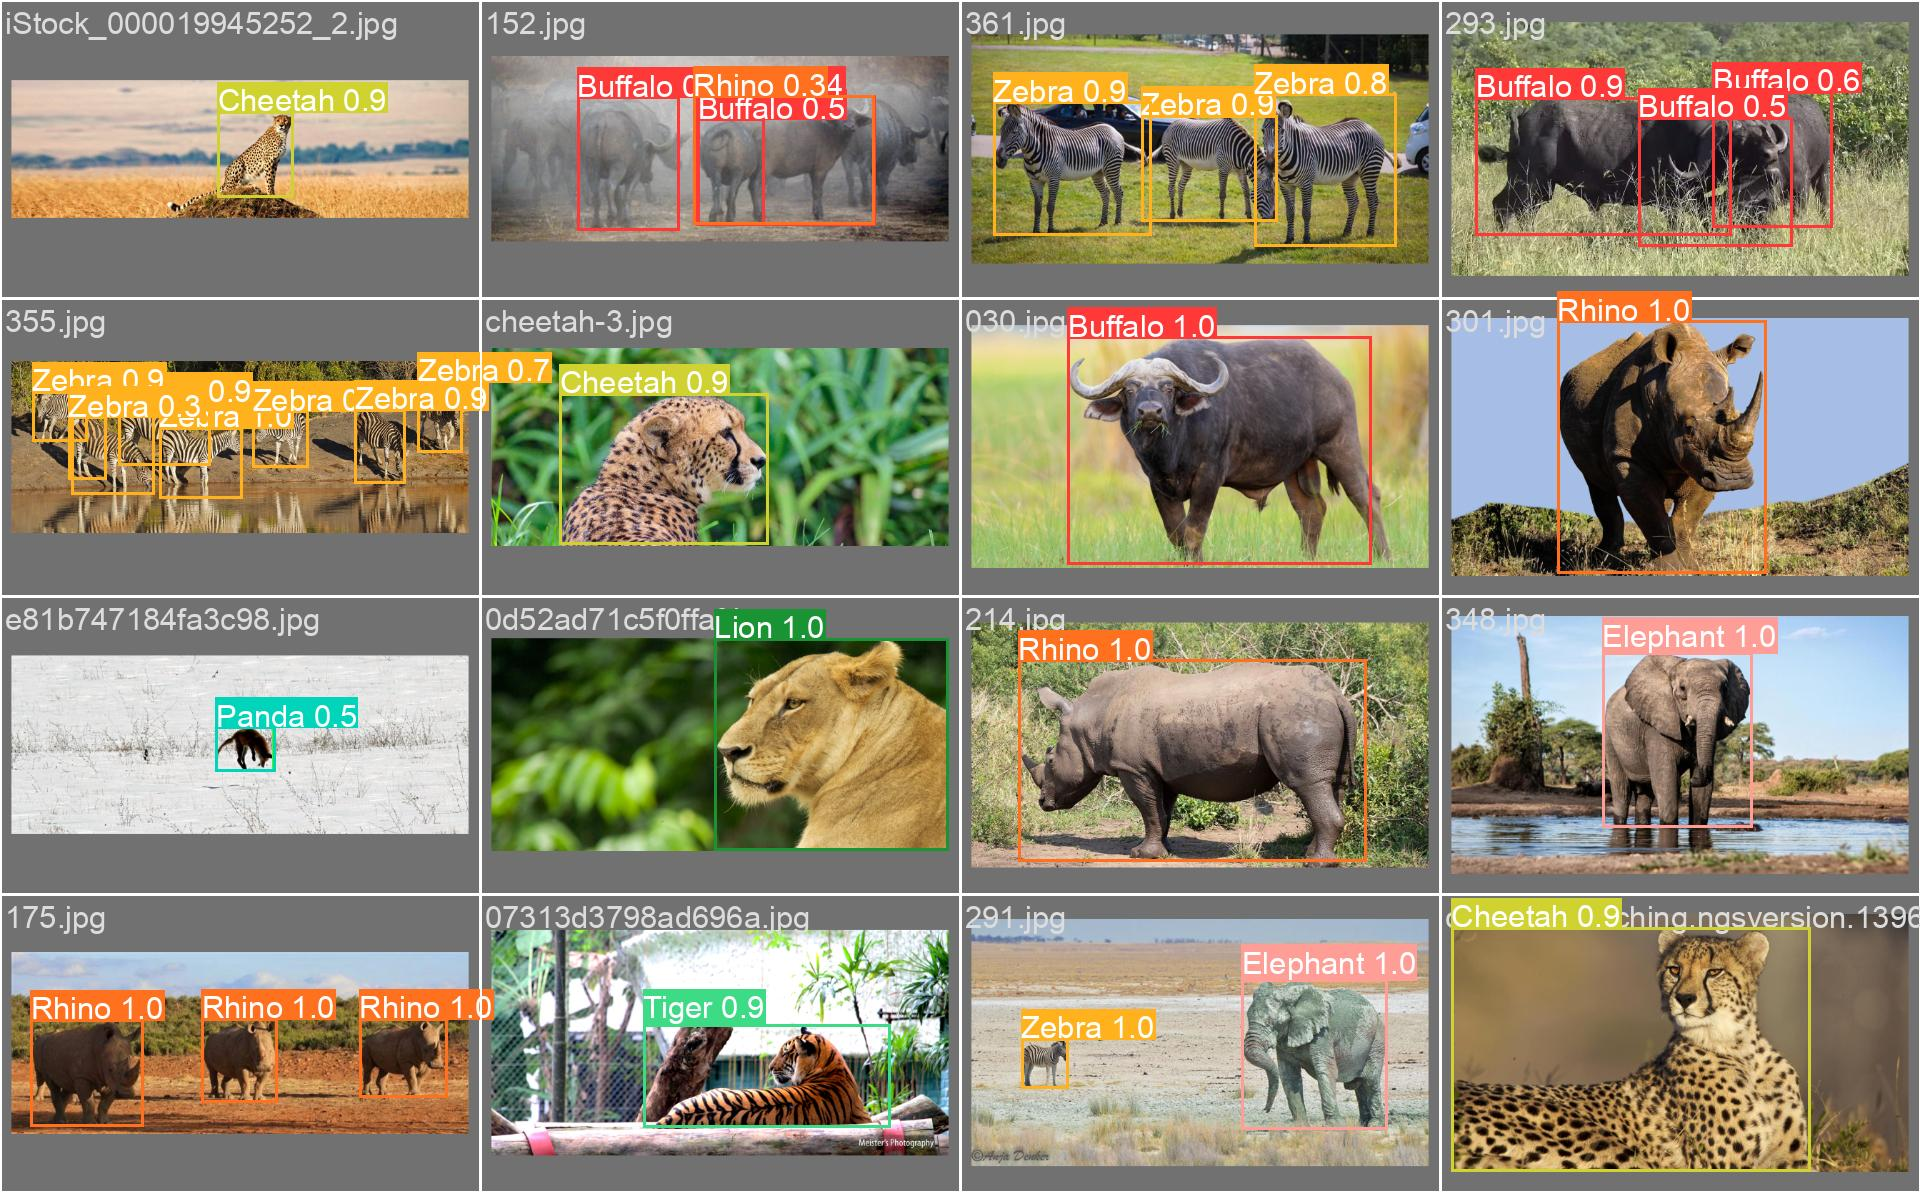

In [ ]:
display(Image(filename="runs/detect/train/val_batch0_pred.jpg", width=1000))

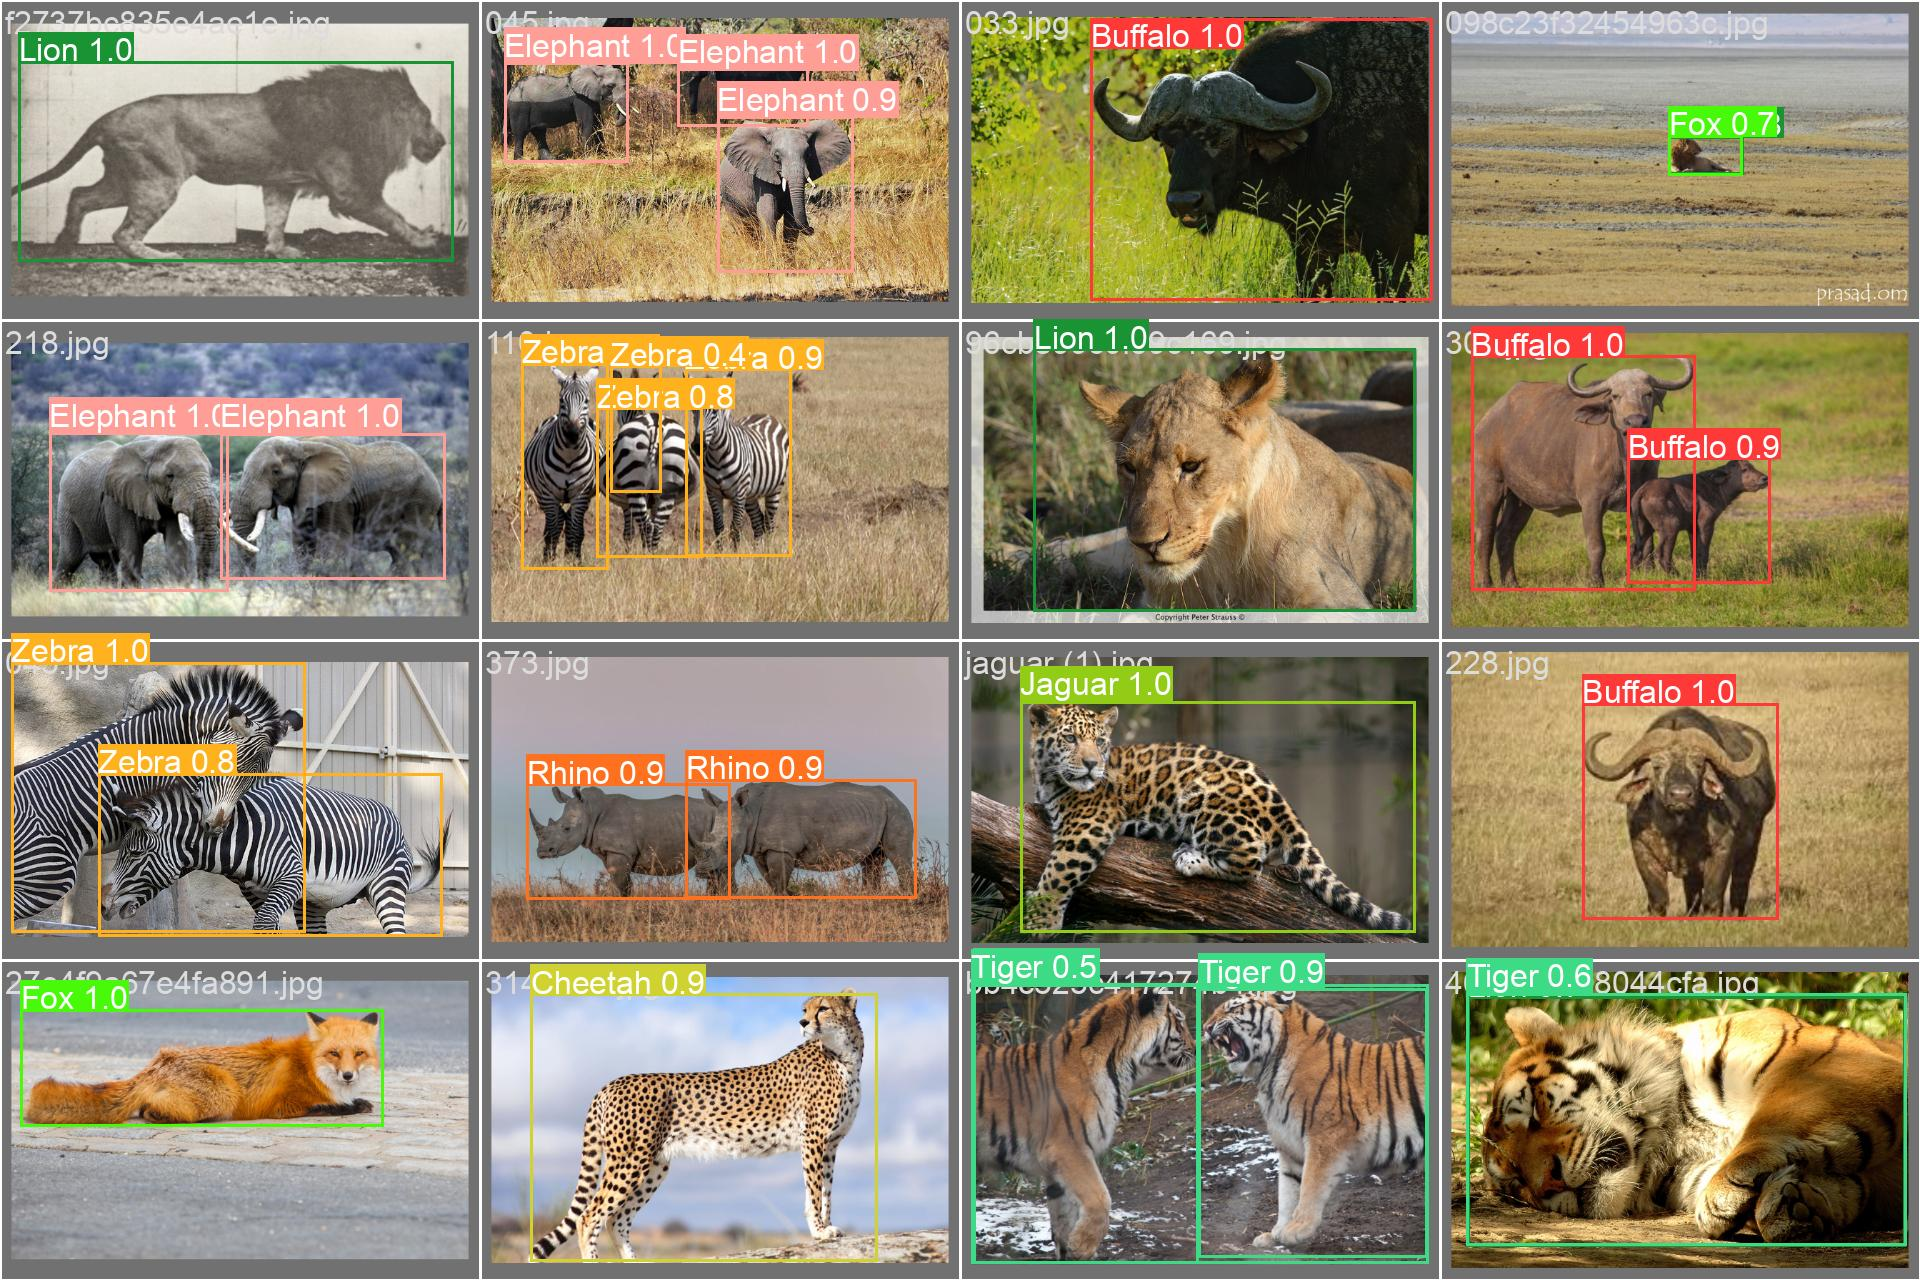

In [ ]:
display(Image(filename="runs/detect/train/val_batch1_pred.jpg", width=1000))

## Inference

### Evaluate the model on the test dataset.


In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=custom.yaml split=test

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients
val: Scanning /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/labels/test/buffalo... 215 images, 0 backgrounds, 0 corrupt: 100% 215/215 [02:22<00:00,  1.51it/s]
val: New cache created: /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/labels/test/buffalo.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:09<00:00,  1.49it/s]
                   all        215        293      0.922       0.91      0.945      0.812
               Buffalo        215         38      0.918      0.895      0.968      0.828
              Elephant        215         43      0.931      0.943      0.979      0.789
                 Rhino        215         33      0.989       0.97      0.974      0.838
                 Zebra      

## Visualize the test output

In [ ]:
!ls 'runs/detect/val'

confusion_matrix_normalized.png  PR_curve.png		val_batch1_labels.jpg
confusion_matrix.png		 R_curve.png		val_batch1_pred.jpg
F1_curve.png			 val_batch0_labels.jpg	val_batch2_labels.jpg
P_curve.png			 val_batch0_pred.jpg	val_batch2_pred.jpg


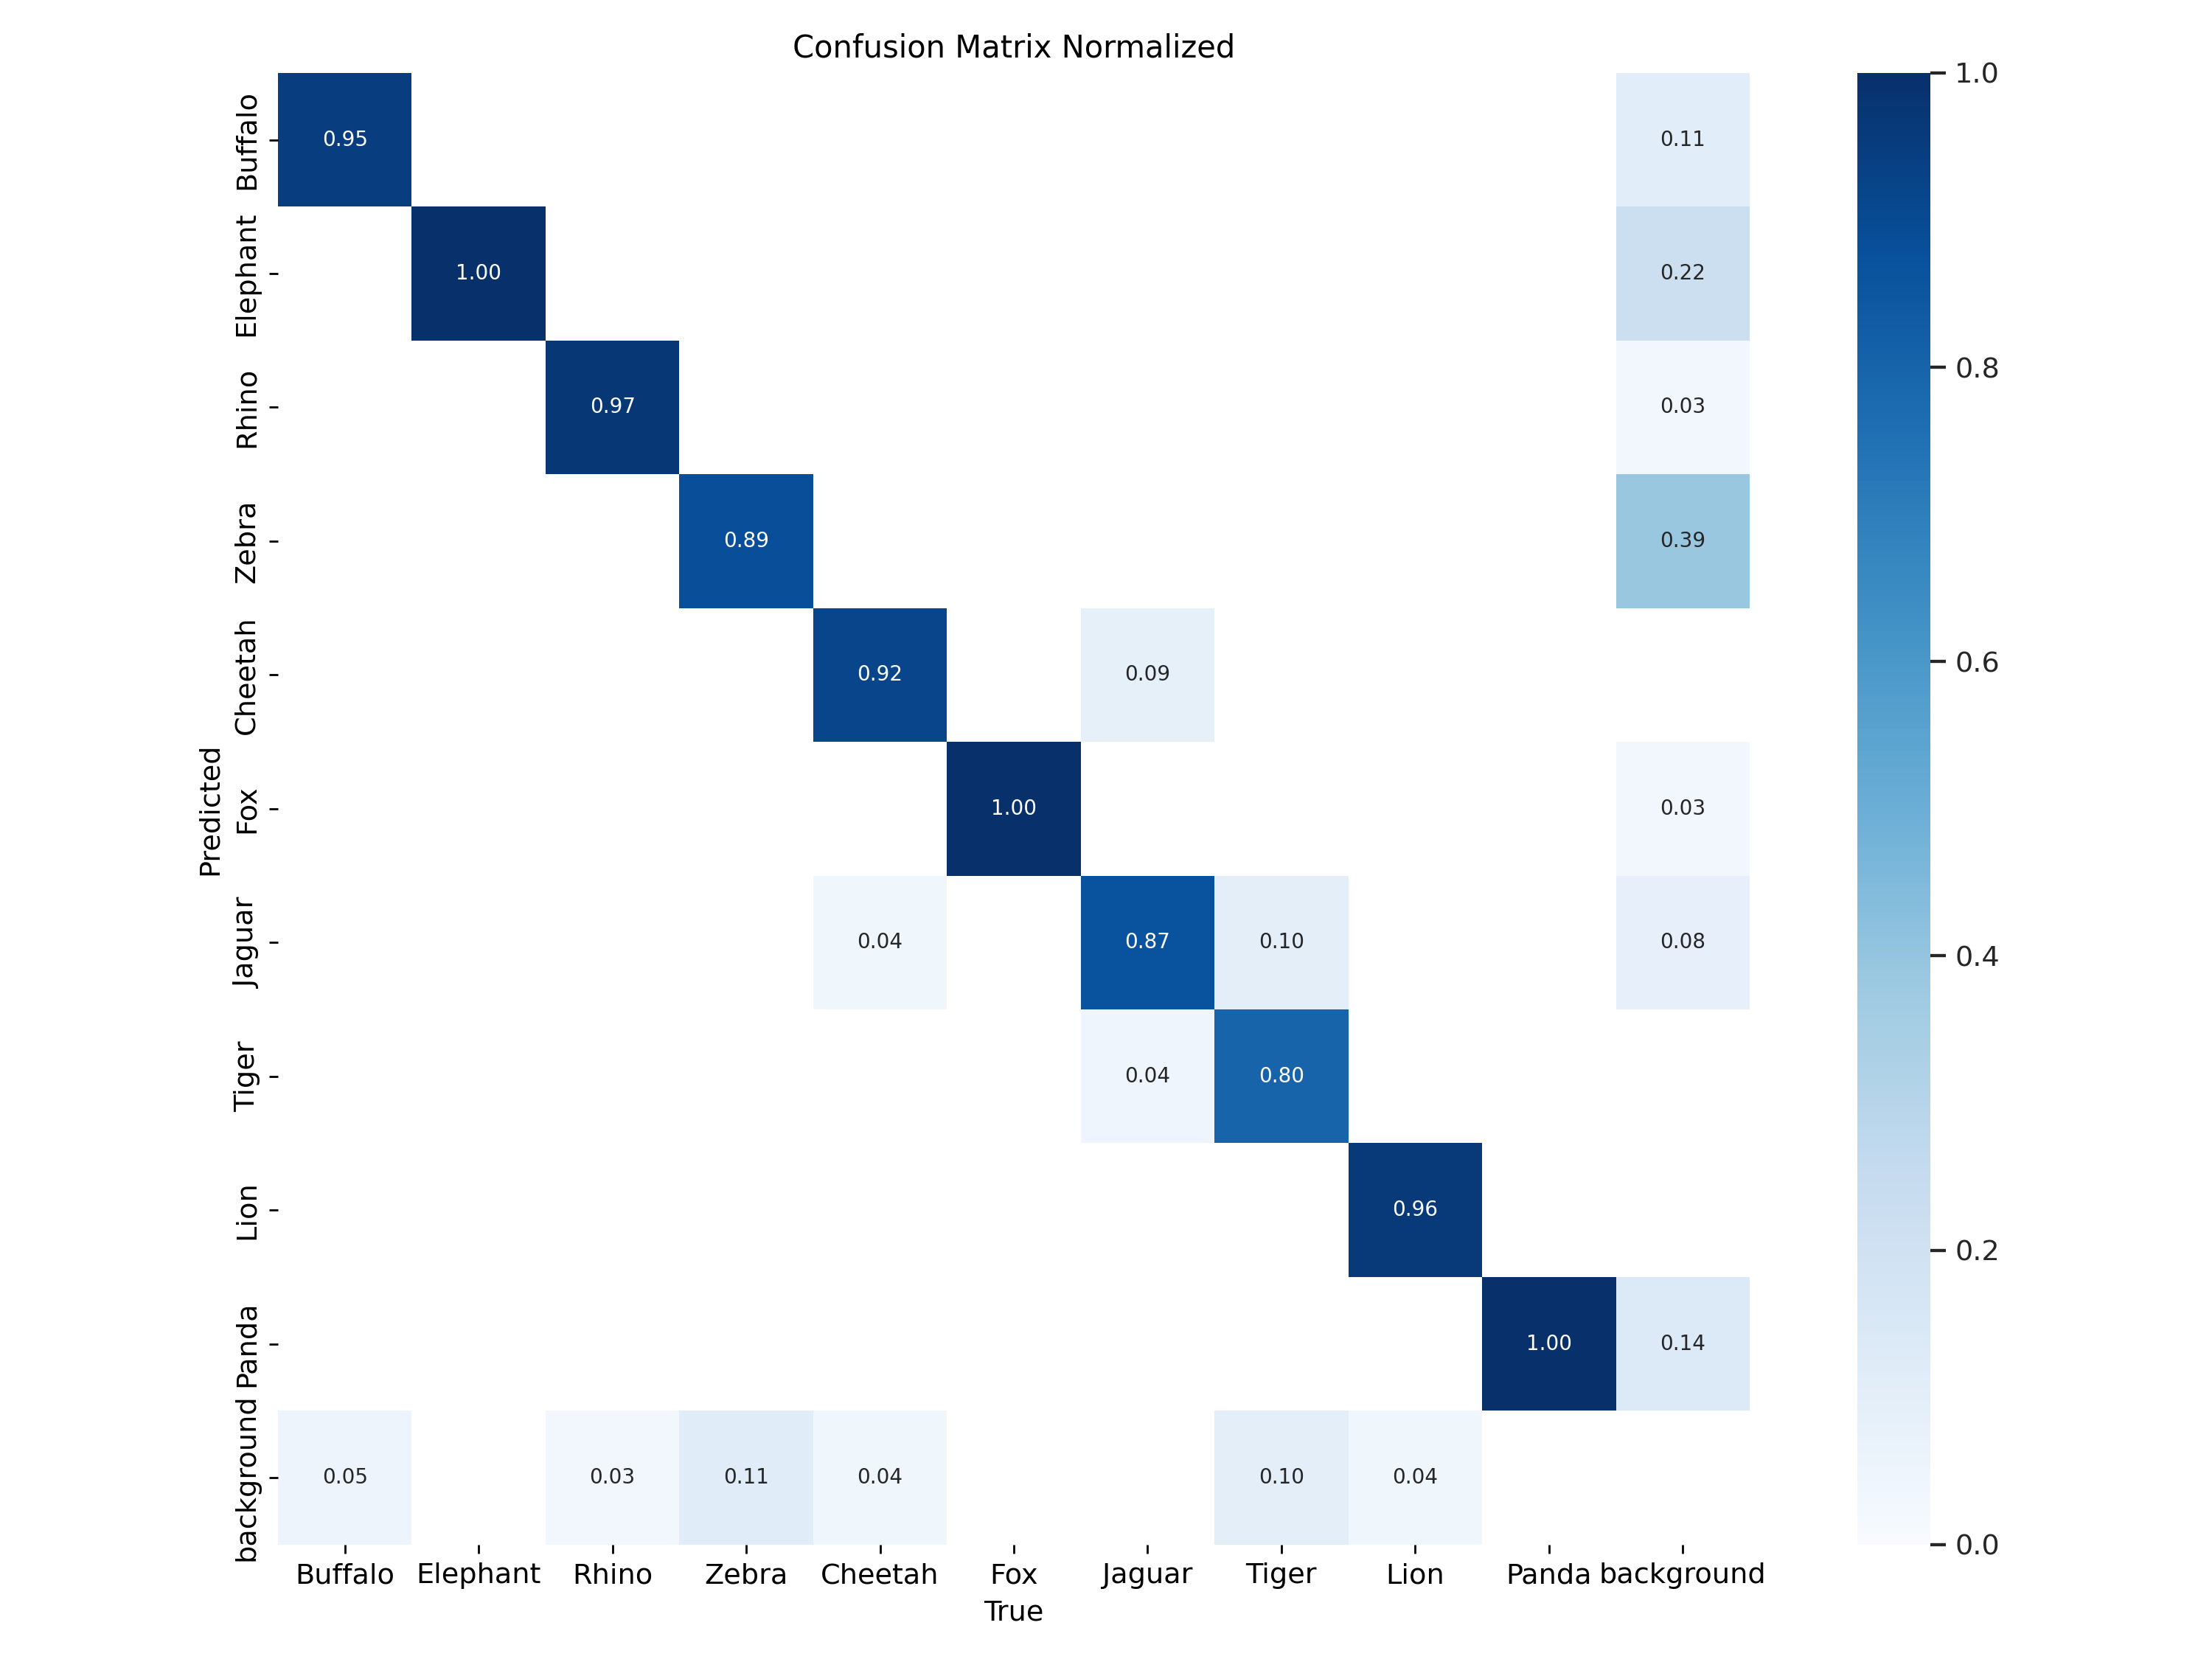

In [ ]:
display(Image(filename="runs/detect/val/confusion_matrix_normalized.png", width=1000))

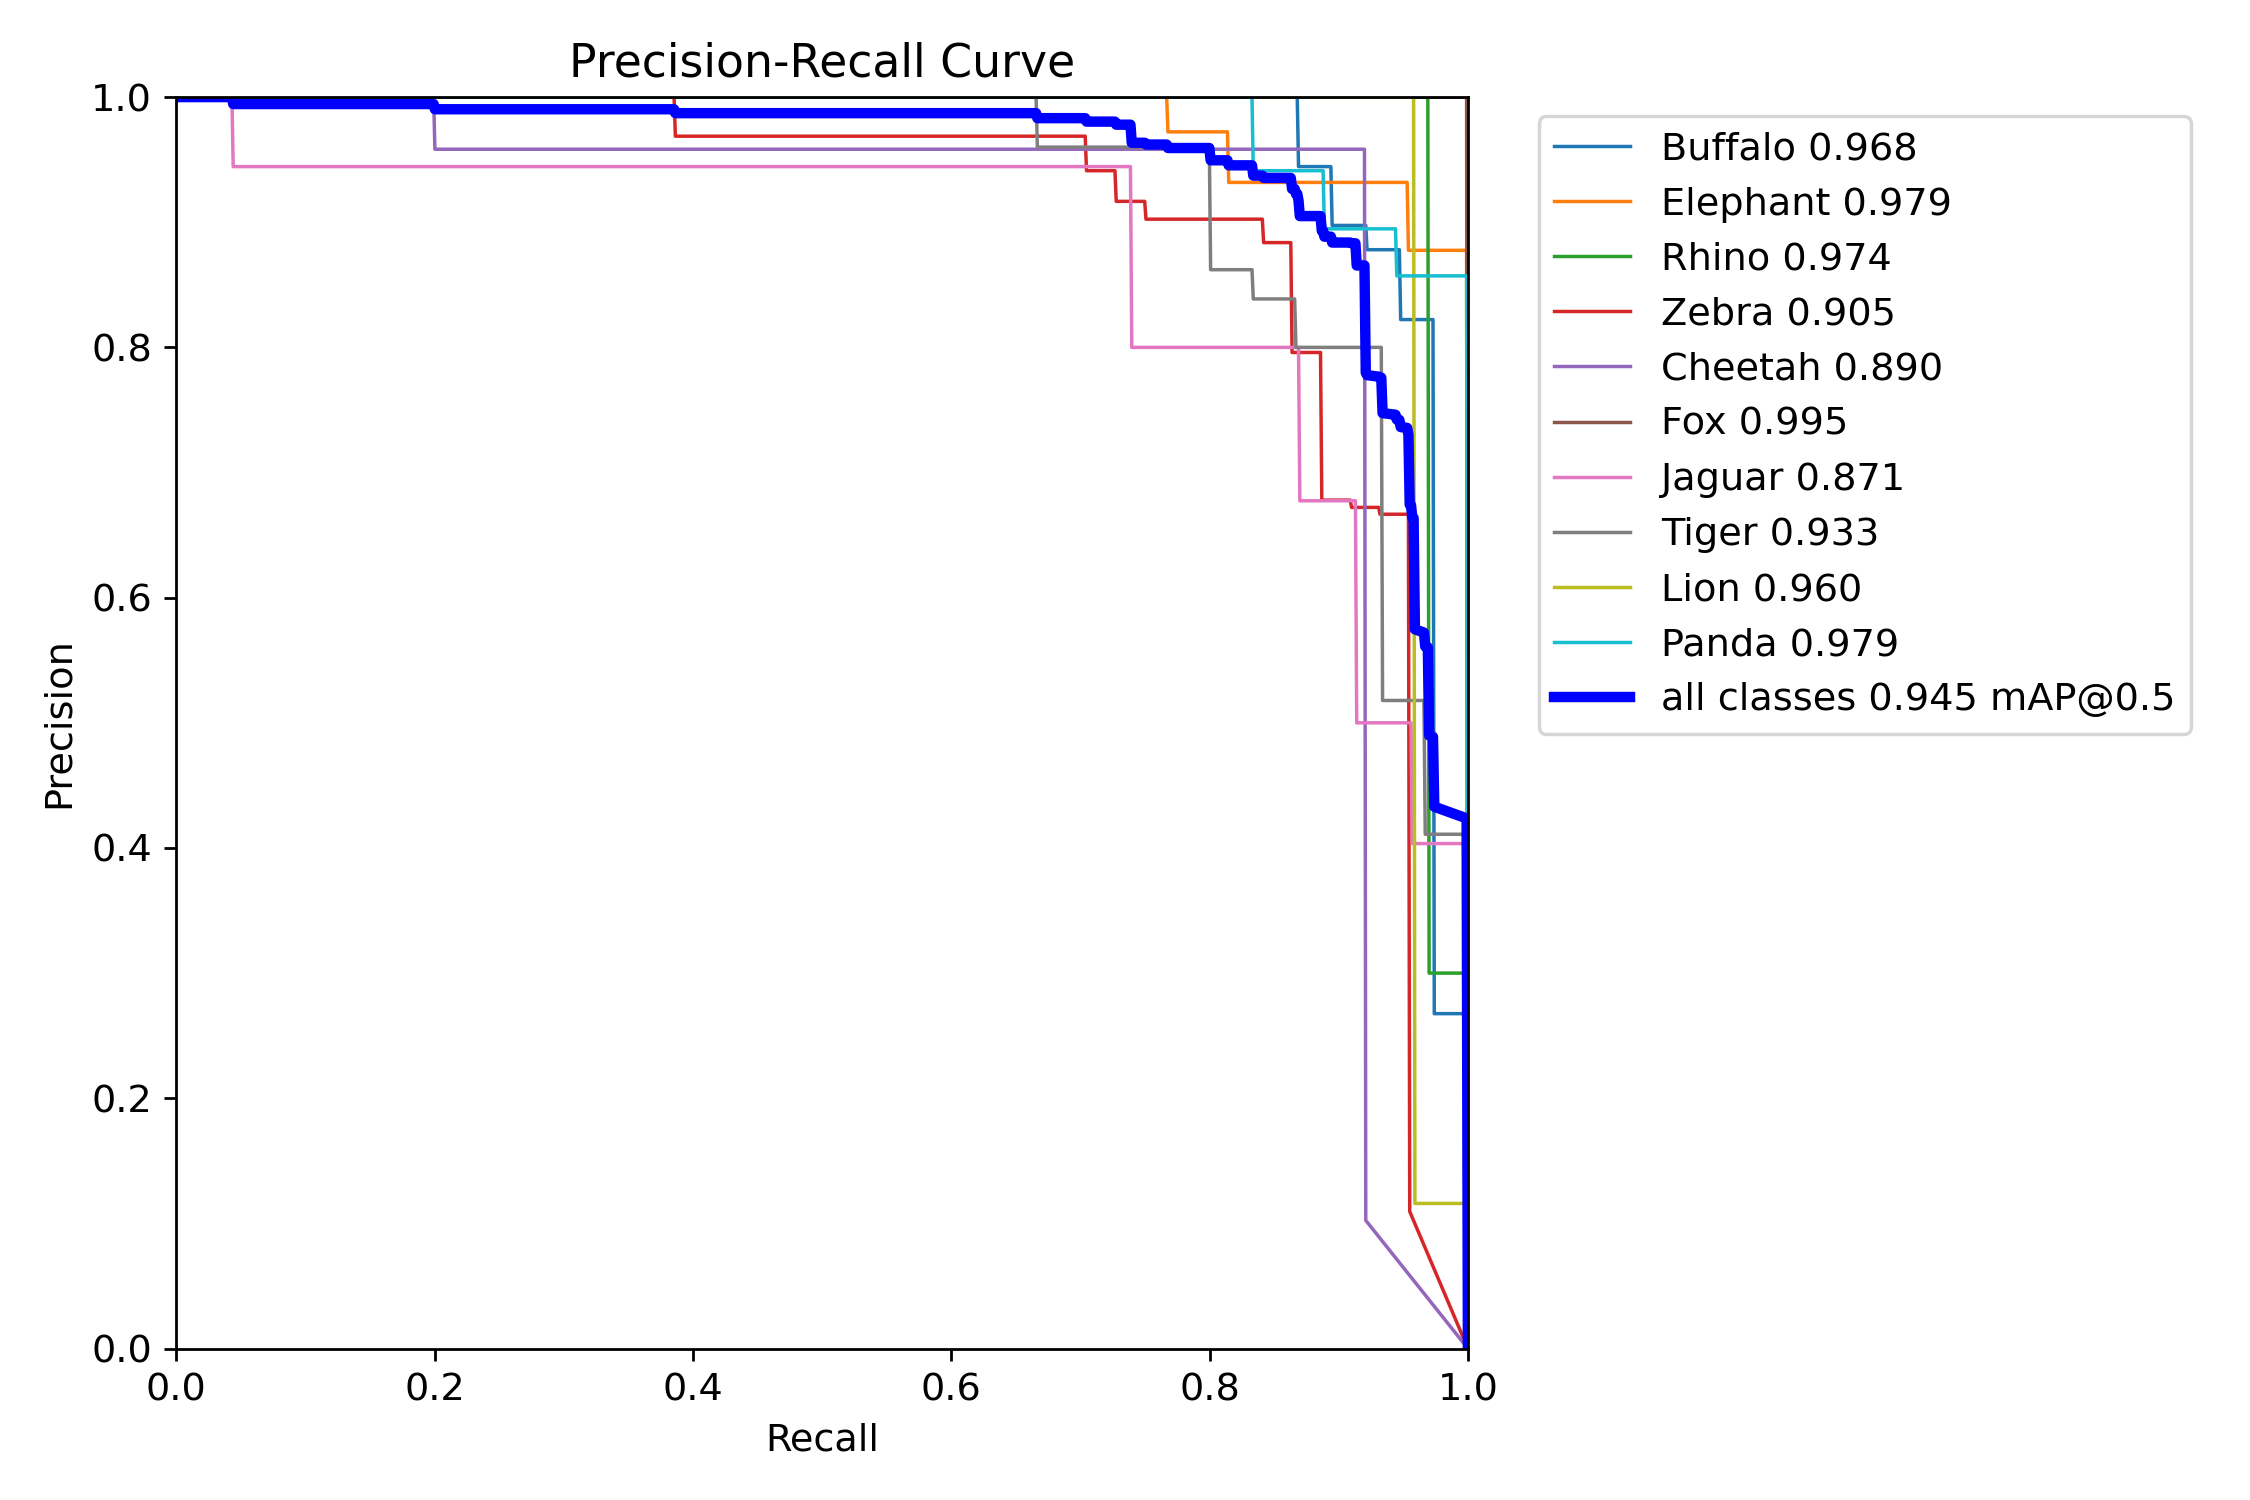

In [10]:
display(Image(filename="runs/detect/val/PR_curve.png", width=1000))

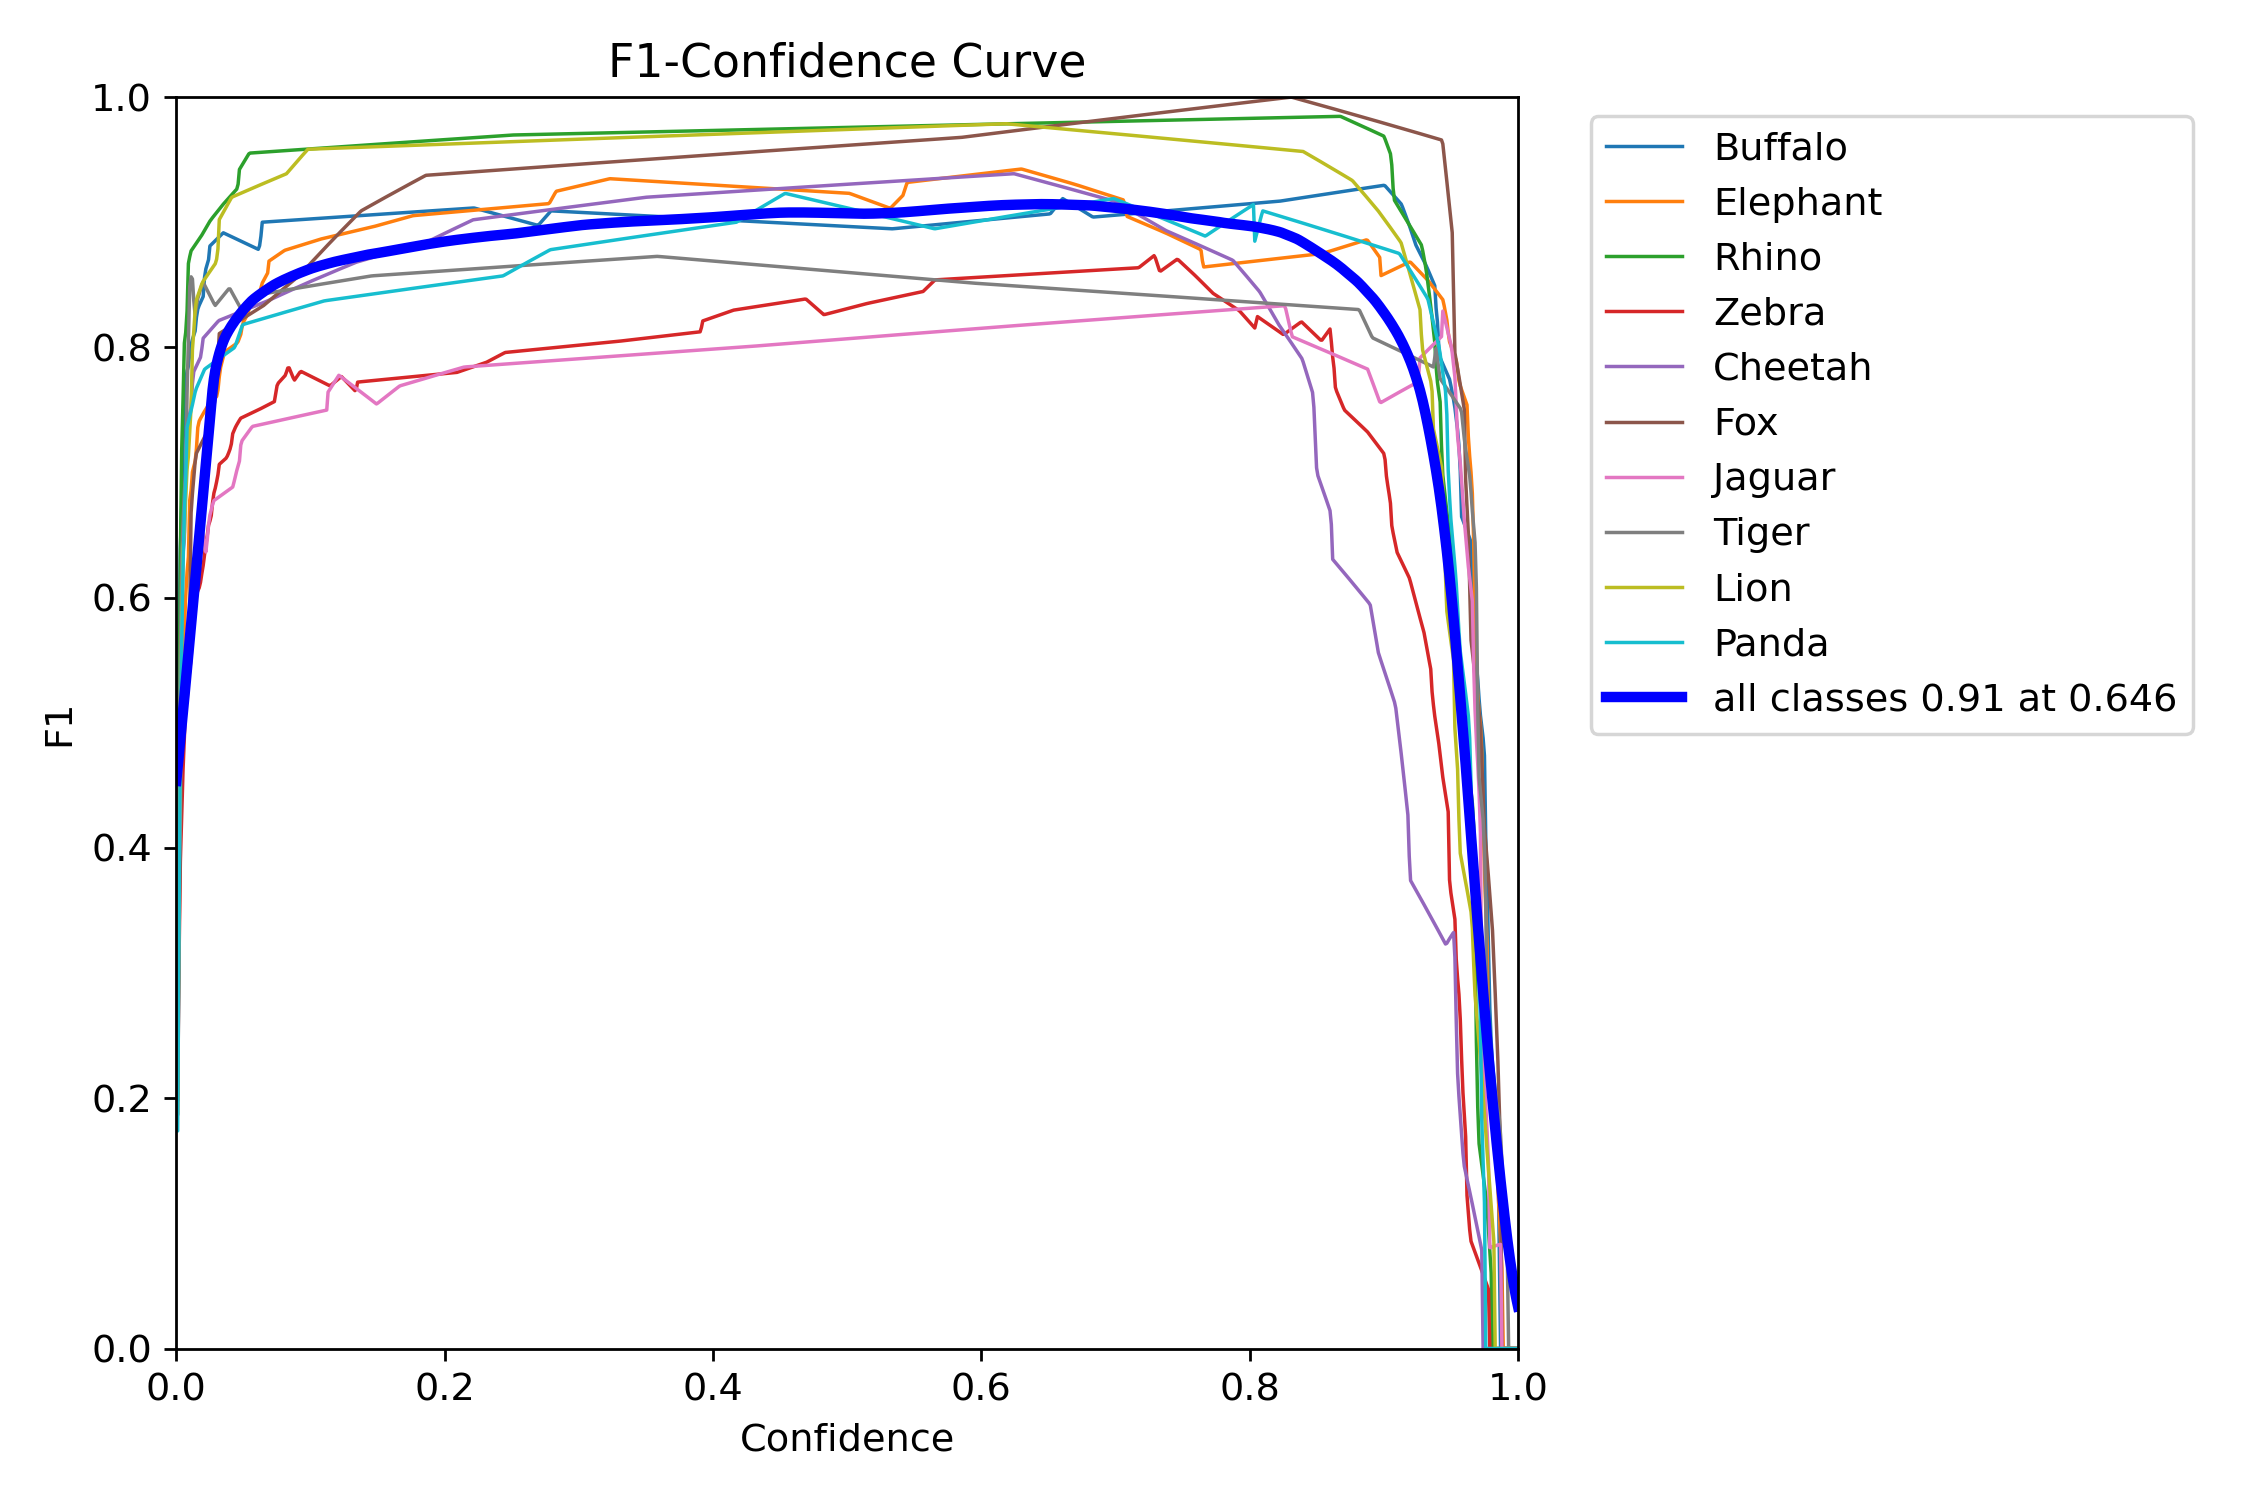

In [ ]:
display(Image(filename="runs/detect/val/F1_curve.png", width=1000))

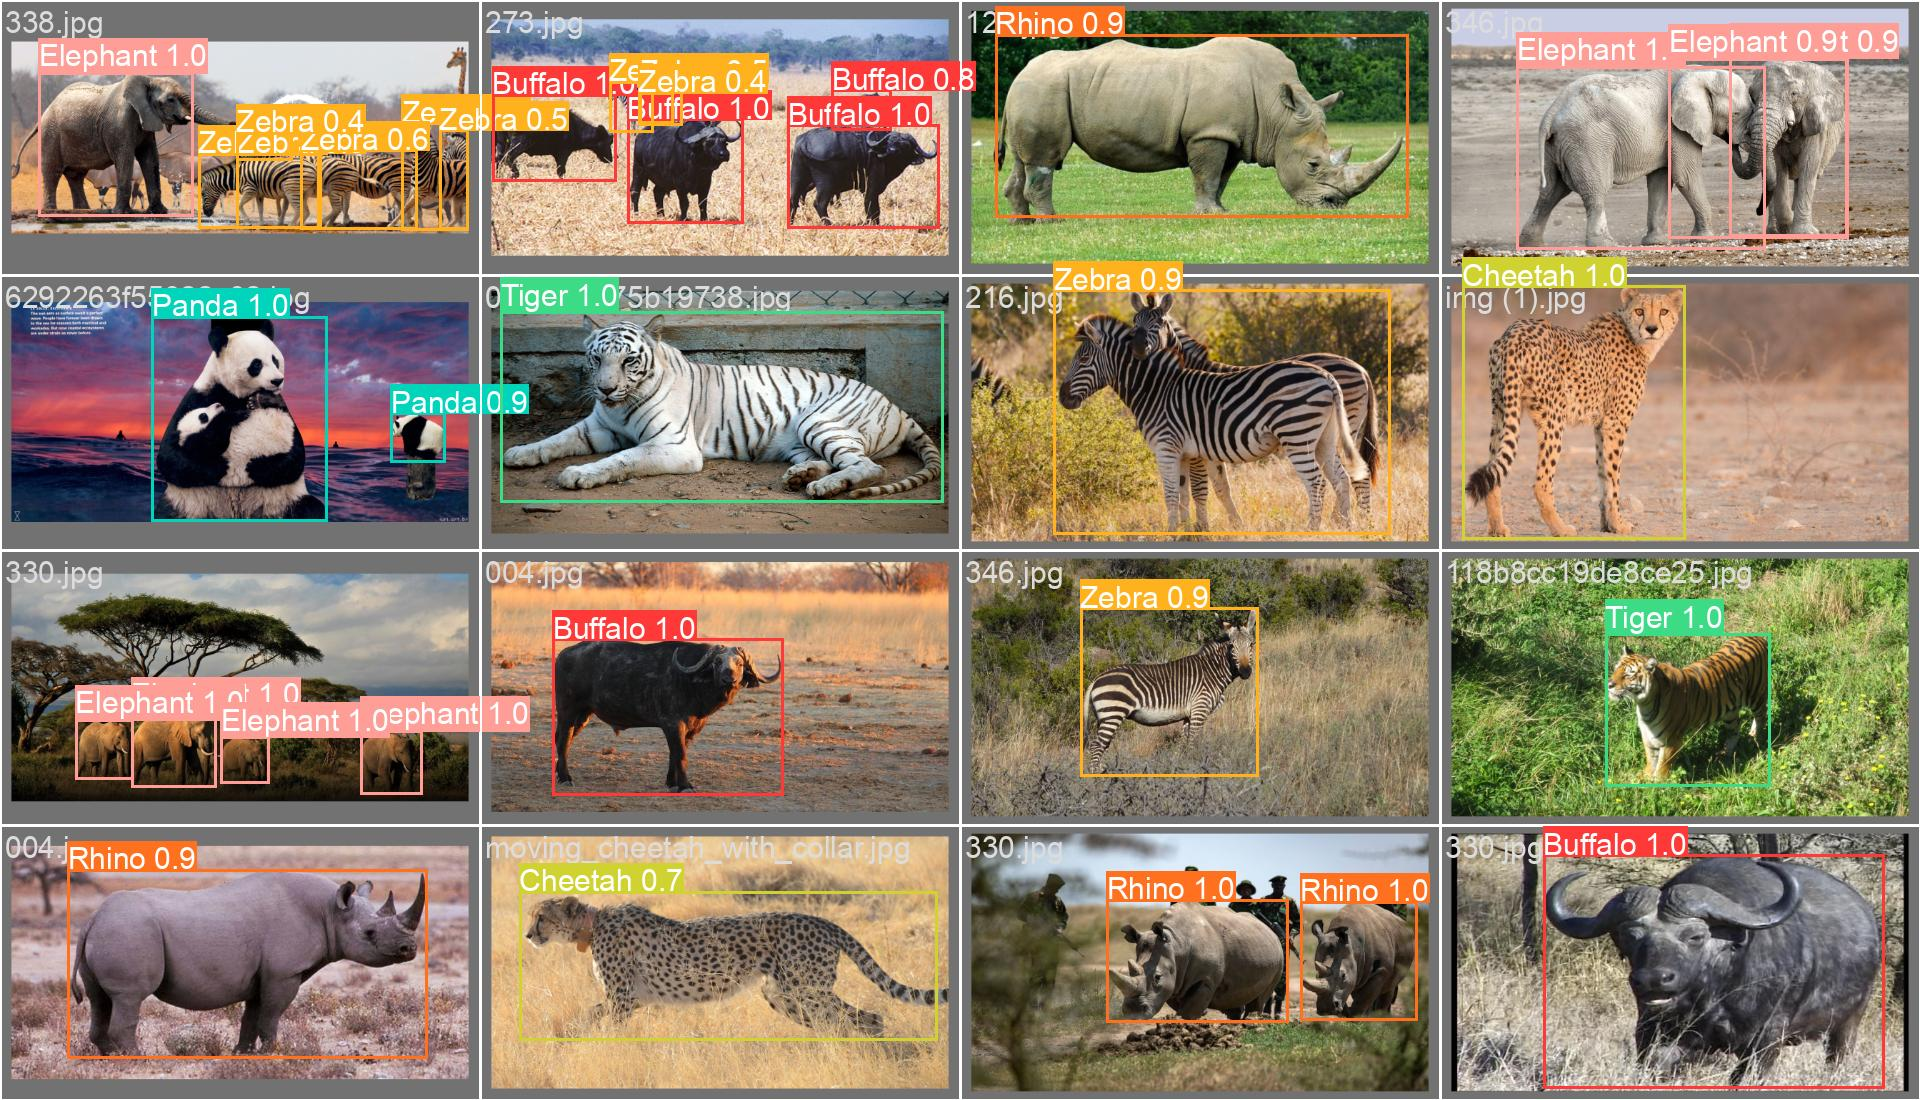

In [ ]:
display(Image(filename="runs/detect/val/val_batch0_pred.jpg", width=1000))

## Inference

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.35 source=data/test save=True

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients

image 1/10 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/test/01.jpg: 480x640 2 Buffalos, 1 Elephant, 50.1ms
image 2/10 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/test/02.jpg: 384x640 1 Cheetah, 51.5ms
image 3/10 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/test/04.jpg: 384x640 2 Elephants, 6.1ms
image 4/10 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/test/05.jpg: 448x640 1 Tiger, 50.4ms
image 5/10 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/test/06.jpg: 480x640 2 Lions, 6.7ms
image 6/10 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/test/07.jpg: 384x640 1 Panda, 6.6ms
image 7/10 /content/dr

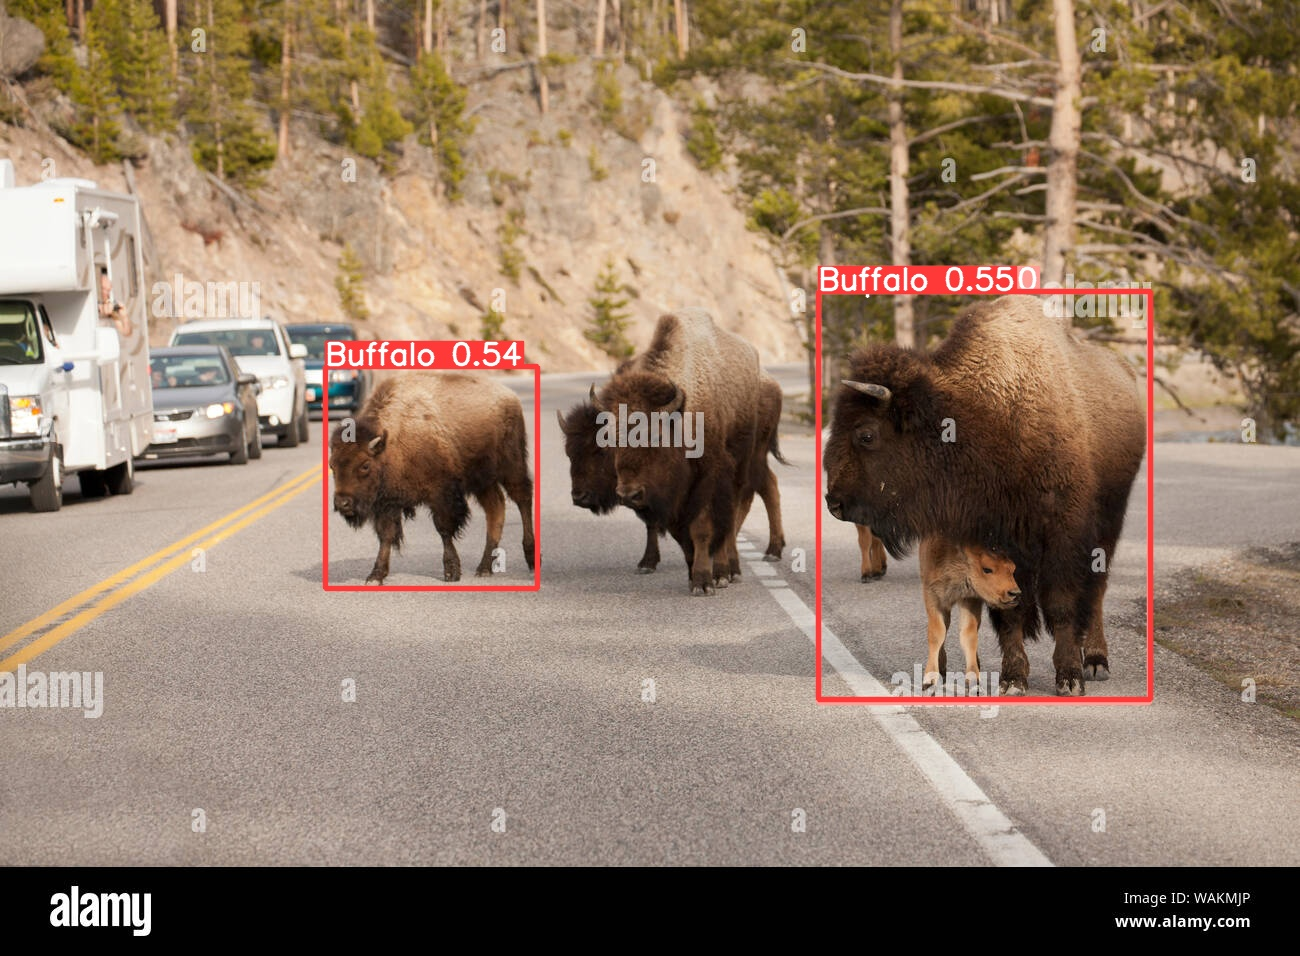

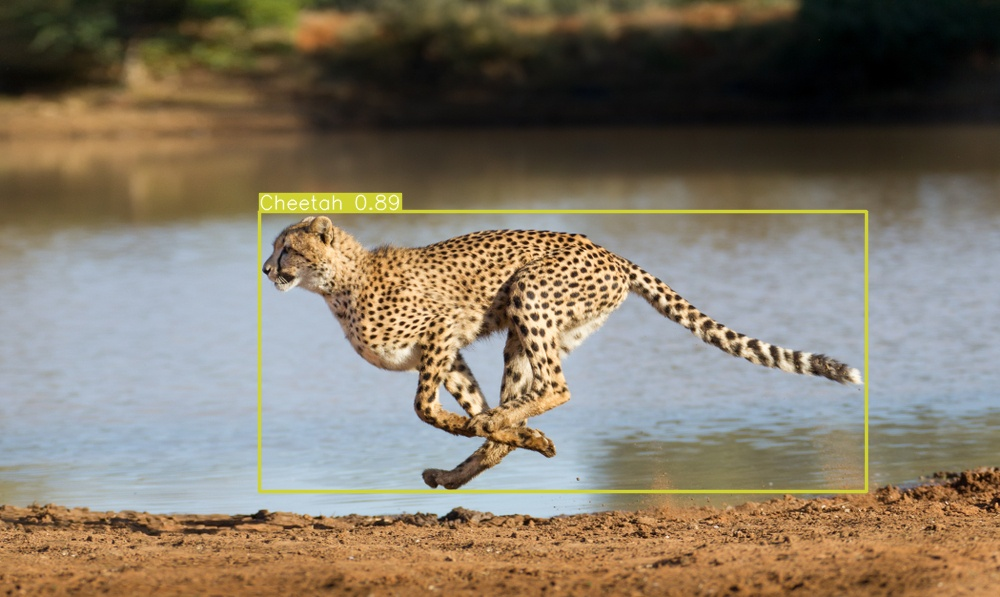

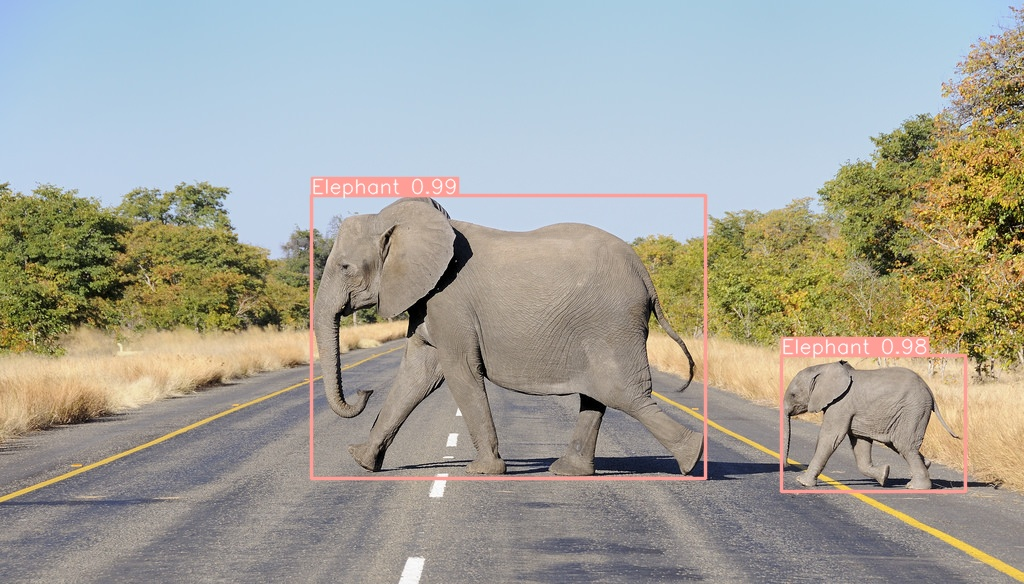

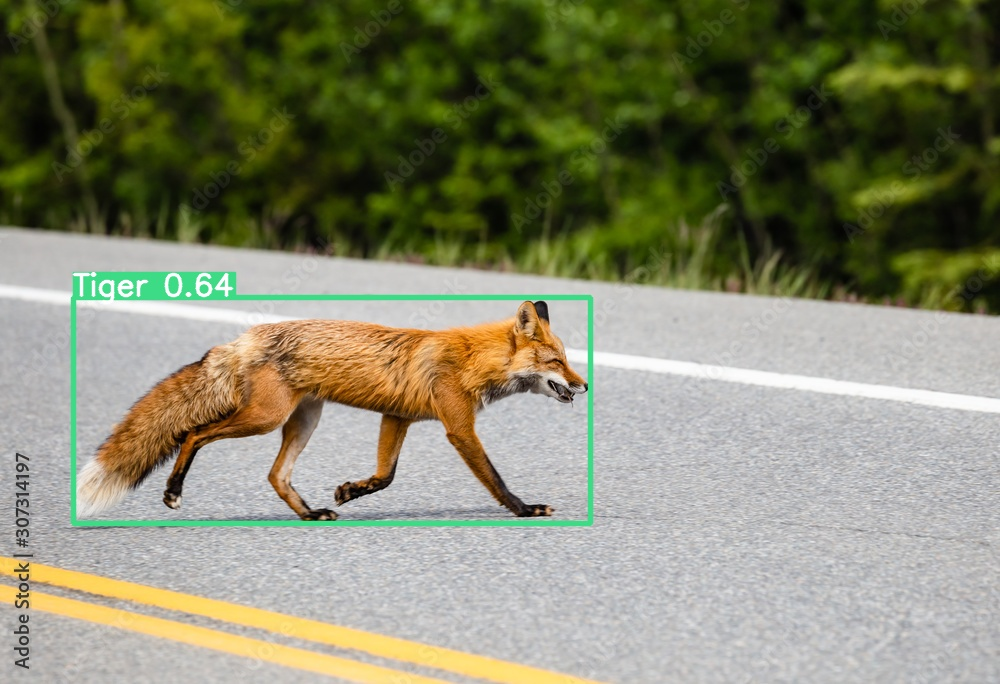

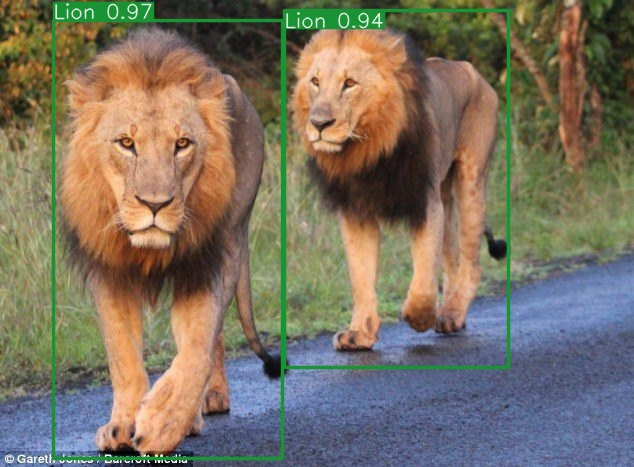

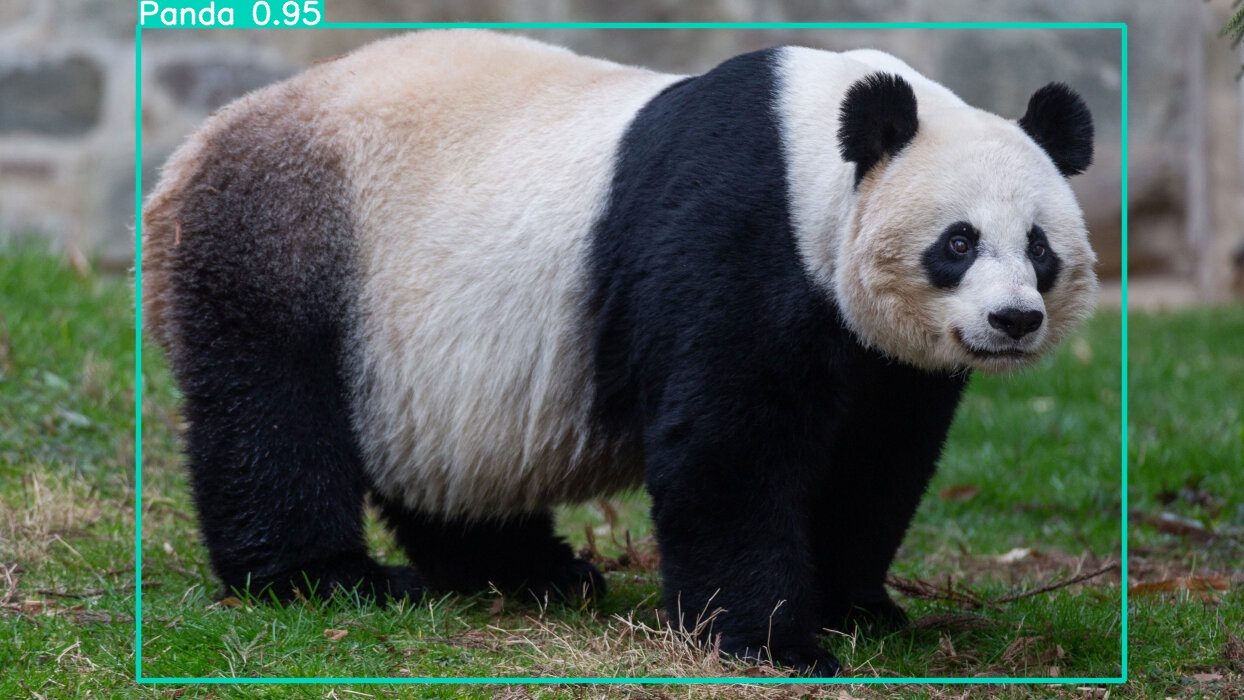

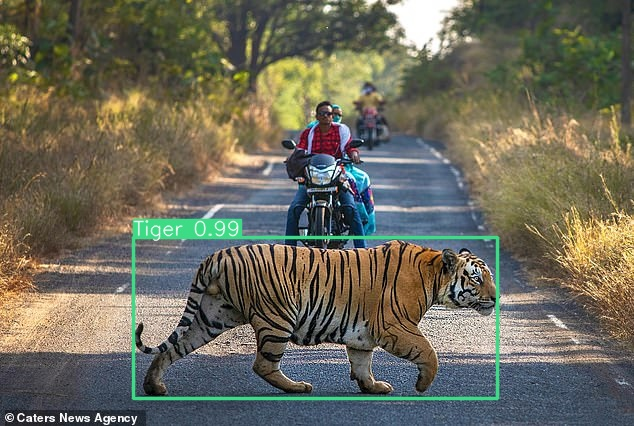

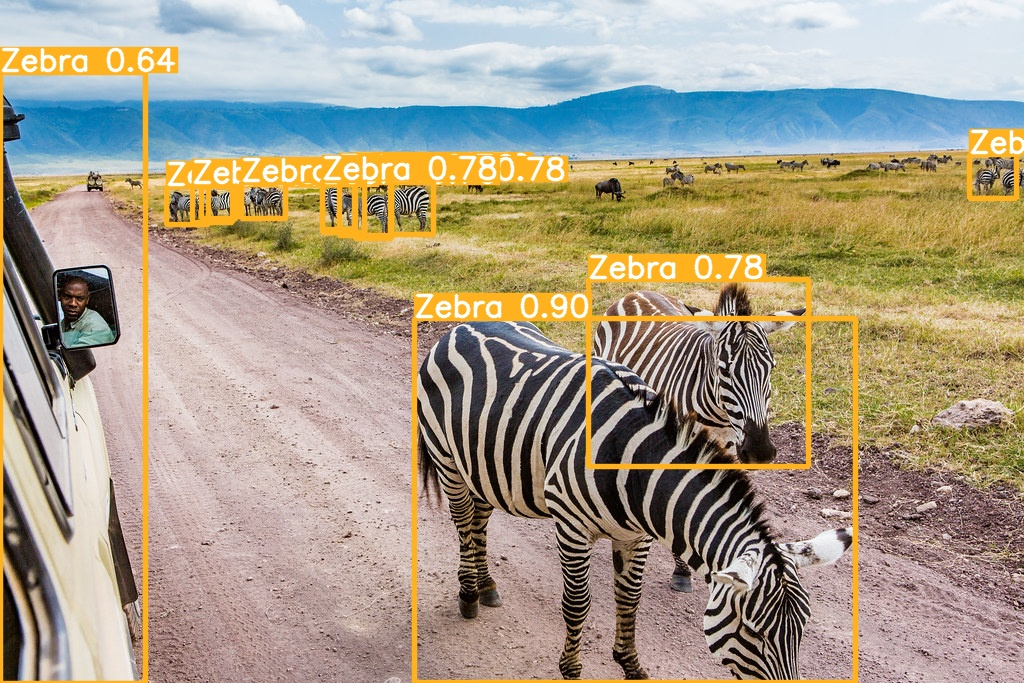

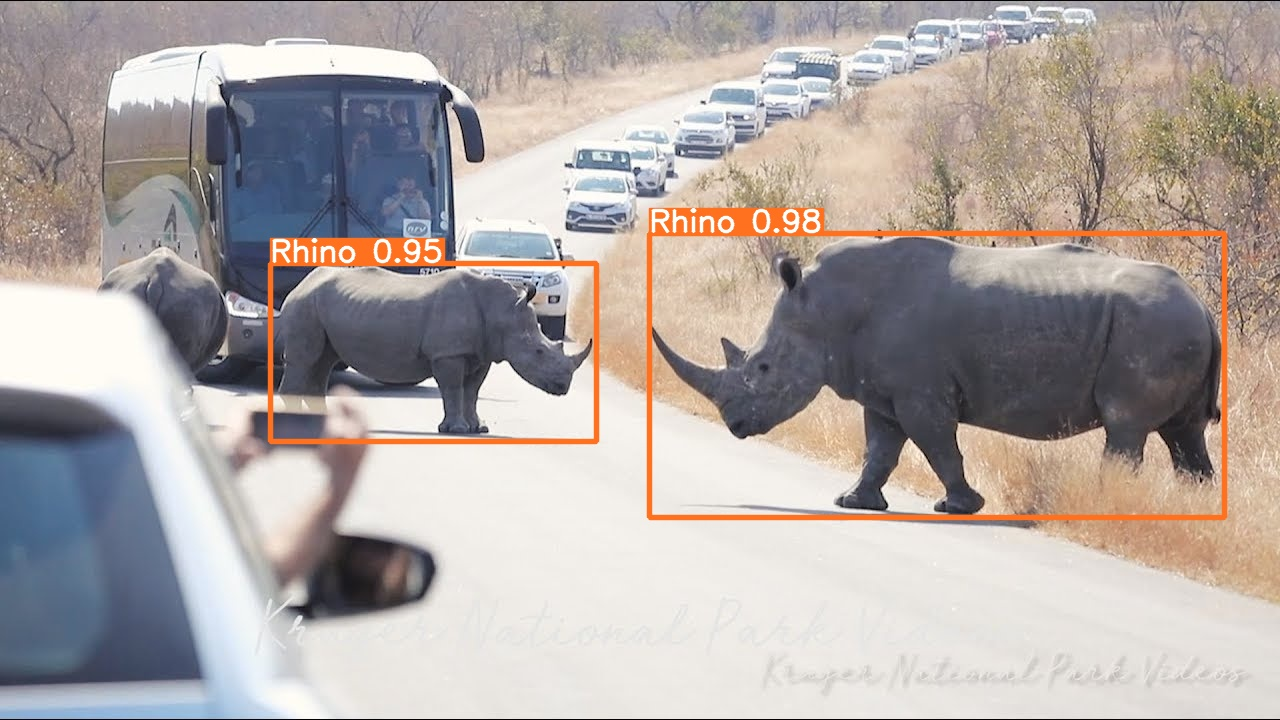

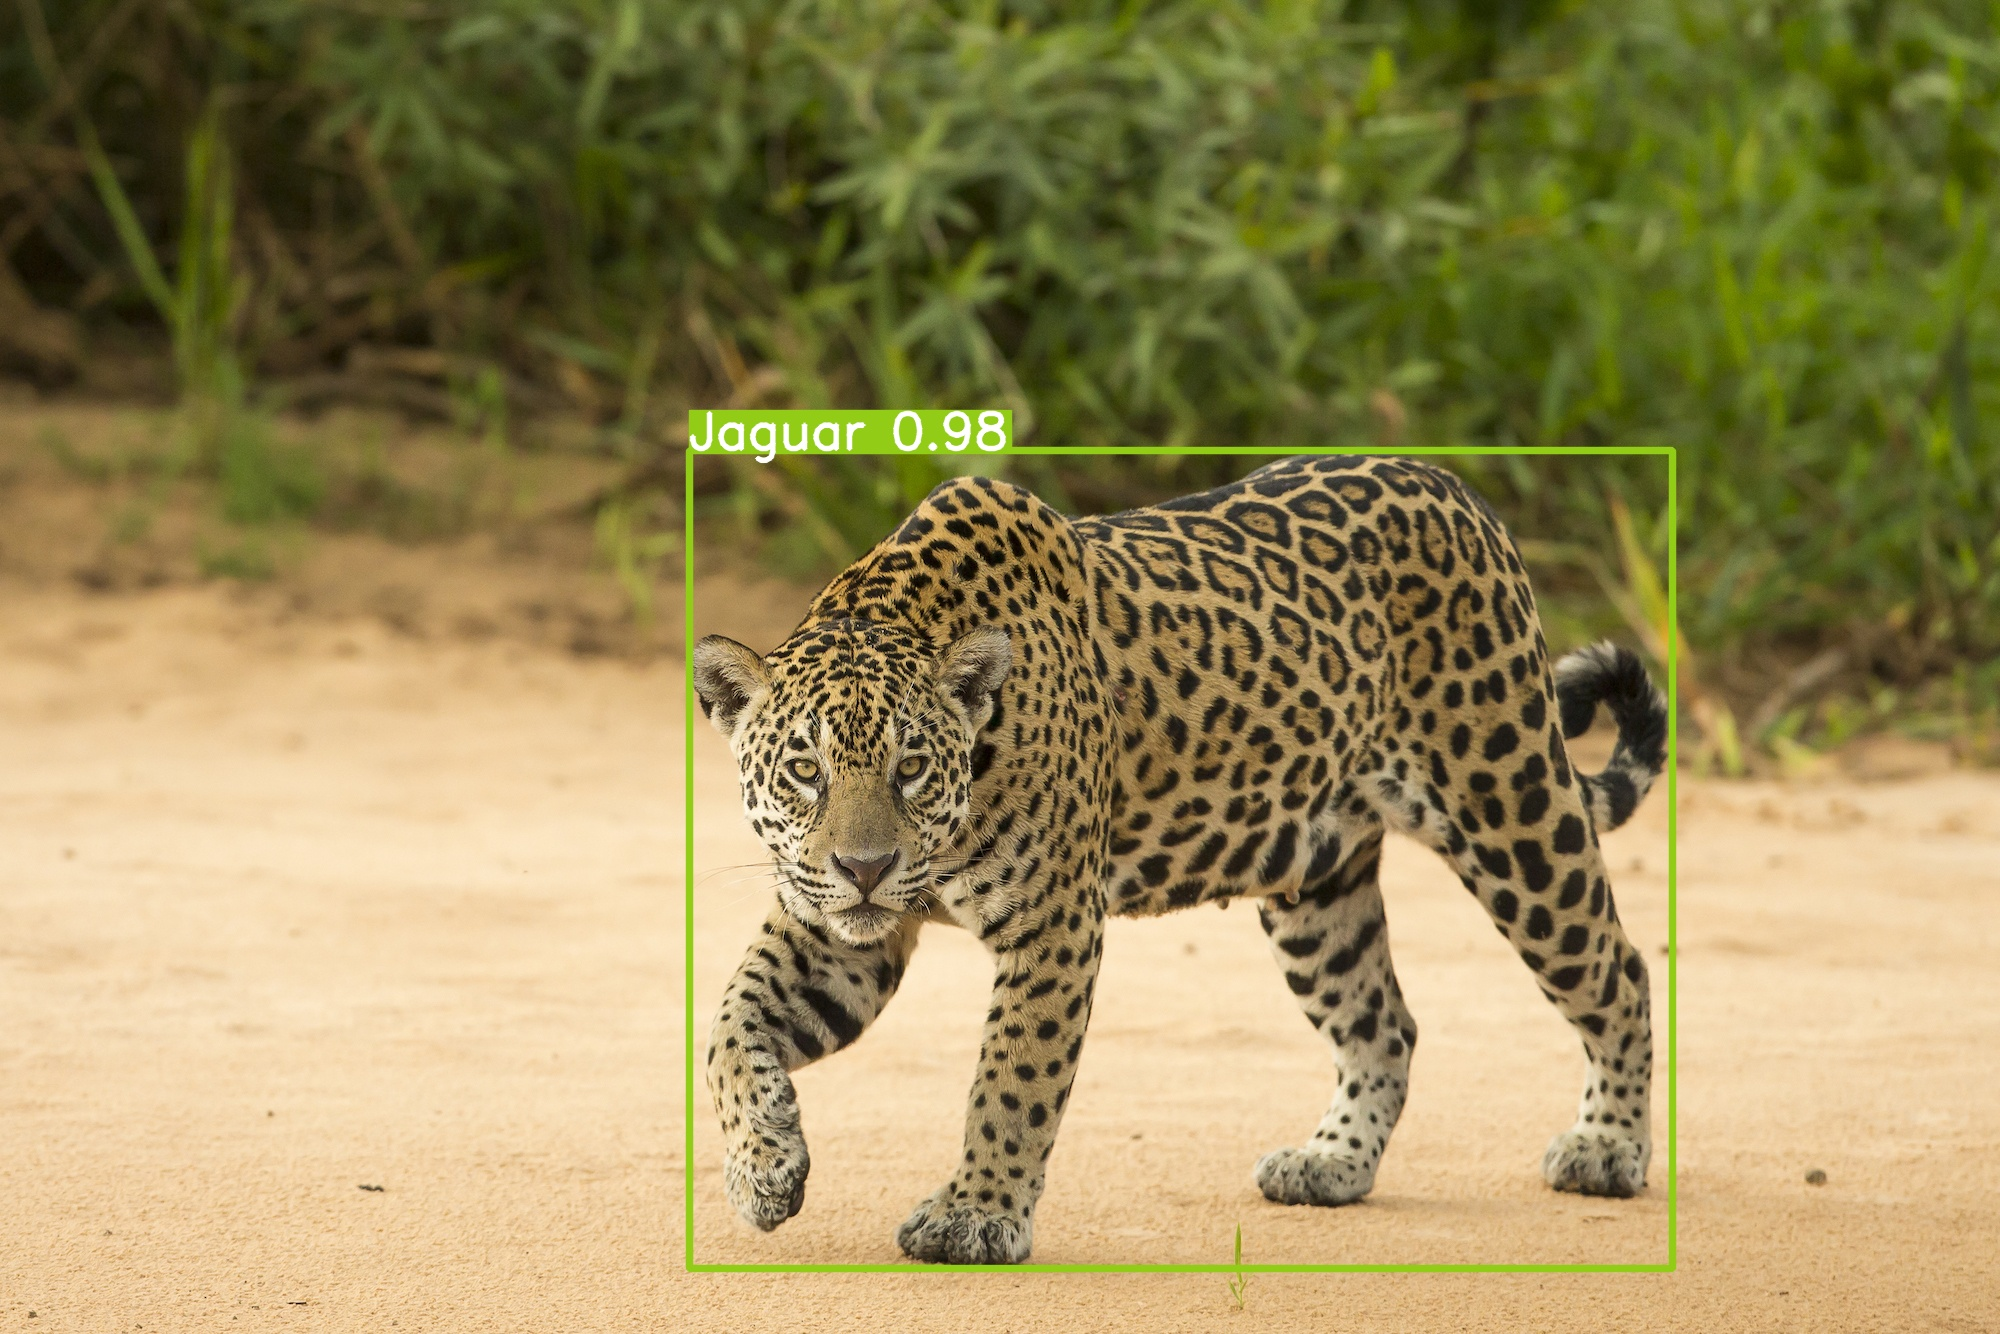

In [ ]:
img_path = glob.glob(f'./runs/detect/predict/*')

for img in img_path:
  display(Image(filename=img, width=500))
  print('\n')

## Export

In [ ]:
!yolo export model=yolov8n_saved_model/yolov8n.h5 format=saved_model